#Case Study 1 : INGV - Volcanic Eruption Prediction

## Part 1 : Loadig the Data

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.72 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19059/1581061/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615462820&Signature=gdRhD7ws7YH7qm0N5CSMwj7cKcVVkQJB9U46jSuzifbNMyorcbkBu%2BGxtZfmKH7BwBm3IO9U2dNvCVL%2Fn09MDoHmi7k5xL2i8l7FsOxtVS%2B0L2n4qMZ0Z4JgIDz26wtXKjDMHMrBA88rhBOD6WL%2BWrBSZhd8xcBTzDbGE2mYvWe6mC7ltnwBulYaFu3PDrmk%2FqgVgvarBBtR8XhkHCPNjJ6B5Ot7cenDTbaSy0dfuVWYtDnBgMFT29I5DpGeFLtXmtiE3Y1M8Z0DYfIhTKMhpVDDVN3jDxN72IX%2Bylcy5YD%2BcOldpLBQU4igngfWleeCzUrUXpIHNiVojsJ2W87baw%3D%3D&response-content-disposition=attachment%3B+filename%3Dpredict-volcanic-eruptions-ingv-oe.zip" -c -O 'predict-volcanic-eruptions-ingv-oe.zip'

--2021-03-08 11:40:34--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19059/1581061/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1615462820&Signature=gdRhD7ws7YH7qm0N5CSMwj7cKcVVkQJB9U46jSuzifbNMyorcbkBu%2BGxtZfmKH7BwBm3IO9U2dNvCVL%2Fn09MDoHmi7k5xL2i8l7FsOxtVS%2B0L2n4qMZ0Z4JgIDz26wtXKjDMHMrBA88rhBOD6WL%2BWrBSZhd8xcBTzDbGE2mYvWe6mC7ltnwBulYaFu3PDrmk%2FqgVgvarBBtR8XhkHCPNjJ6B5Ot7cenDTbaSy0dfuVWYtDnBgMFT29I5DpGeFLtXmtiE3Y1M8Z0DYfIhTKMhpVDDVN3jDxN72IX%2Bylcy5YD%2BcOldpLBQU4igngfWleeCzUrUXpIHNiVojsJ2W87baw%3D%3D&response-content-disposition=attachment%3B+filename%3Dpredict-volcanic-eruptions-ingv-oe.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.183.128, 173.194.198.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10167647920 (9.5G) [application/zip]
Saving to: ‘predict-volcanic-

In [ ]:
!unzip predict-volcanic-eruptions-ingv-oe.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/762802287.csv      
  inflating: test/763399656.csv      
  inflating: test/763412178.csv      
  inflating: test/764592471.csv      
  inflating: test/765116390.csv      
  inflating: test/765173266.csv      
  inflating: test/765224352.csv      
  inflating: test/765388699.csv      
  inflating: test/765687413.csv      
  inflating: test/766124910.csv      
  inflating: test/766202079.csv      
  inflating: test/766337533.csv      
  inflating: test/766739031.csv      
  inflating: test/767529410.csv      
  inflating: test/767647284.csv      
  inflating: test/768744818.csv      
  inflating: test/769004776.csv      
  inflating: test/769353991.csv      
  inflating: test/769421932.csv      
  inflating: test/769716639.csv      
  inflating: test/76993562.csv       
  inflating: test/769998386.csv      
  inflating: test/770206605.csv      
  inflating: test/770234713.csv      
  inflating: test/770323981.csv      

### 1.1 Extracting the path of Files

In [ ]:
# Required libraries
import librosa
import pathlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import signal
from scipy.fft import fftshift
from scipy.fft import fft,fftfreq
import seaborn as sns

In [ ]:
#getting the path of 'train'
data_root = pathlib.Path('train')

In [ ]:
#listing the directory
all_paths = list(data_root.glob('*/'))

## Part 2: Overview Of Dataset

In this Section we will be lookig into the basic features of the dataset like number of datapoints, repeatation of any value, missing values etc...

In [ ]:
#Loading the dataset
df=pd.read_csv("train.csv")

In [ ]:
# checking the shape of the dataset
df.shape

(4431, 2)

In [ ]:
df.columns

Index(['segment_id', 'time_to_eruption'], dtype='object')

In [ ]:
#Checking for the number of unique values in time for eruption
df['time_to_eruption'].value_counts()

23385989    2
10175117    1
27292311    1
20478572    1
26139290    1
           ..
8004890     1
10908952    1
34696471    1
12547944    1
1124353     1
Name: time_to_eruption, Length: 4430, dtype: int64

In [ ]:
# Since we found 2 observations with same value we are checking for any possible repeation
df[df.time_to_eruption==23385989]

,segment_id,time_to_eruption
1485,549832738,23385989
1777,1049892705,23385989


In [ ]:
for path in all_paths:
  if path.name.split('.')[0]=='549832738':
    df1=pd.read_csv(path)
  if path.name.split('.')[0]=='1049892705':
    df2=pd.read_csv(path)

In [ ]:
# Comparing the Observation of 549832738
df1

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,-394.0,36.0,42.0,350.0,144.0,755.0,211.0,-351.0,61.0,-568.0
1,-489.0,64.0,-59.0,343.0,183.0,1058.0,243.0,-365.0,33.0,-634.0
2,-400.0,102.0,-180.0,317.0,177.0,1029.0,81.0,-312.0,10.0,-692.0
3,-271.0,147.0,-182.0,296.0,142.0,779.0,-233.0,-622.0,-21.0,-722.0
4,-278.0,206.0,-415.0,177.0,95.0,991.0,-557.0,-269.0,-107.0,-723.0
...,...,...,...,...,...,...,...,...,...,...
59996,-242.0,-908.0,14.0,400.0,16.0,-628.0,-431.0,29.0,NaN,-373.0
59997,326.0,-885.0,12.0,420.0,14.0,-298.0,-947.0,282.0,NaN,-364.0
59998,38.0,-829.0,106.0,443.0,17.0,-239.0,-930.0,269.0,NaN,-361.0
59999,54.0,-711.0,225.0,439.0,22.0,-300.0,-654.0,618.0,NaN,-367.0


In [ ]:
# Comparing the Observation of 1049892705
df2

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,120.0,-57.0,-86.0,-322.0,-146.0,40.0,755.0,-1005.0,23.0,918.0
1,97.0,-42.0,-95.0,-441.0,-51.0,143.0,643.0,-1189.0,-36.0,818.0
2,85.0,-37.0,-97.0,-558.0,29.0,269.0,465.0,-1348.0,-104.0,666.0
3,69.0,-115.0,-134.0,-656.0,81.0,331.0,243.0,-1424.0,-171.0,471.0
4,42.0,-314.0,-141.0,-723.0,108.0,203.0,215.0,-1559.0,-180.0,250.0
...,...,...,...,...,...,...,...,...,...,...
59996,-27.0,-651.0,160.0,-733.0,9.0,-459.0,-110.0,485.0,-67.0,1224.0
59997,-7.0,-439.0,83.0,-726.0,39.0,-417.0,-95.0,158.0,-64.0,1294.0
59998,-3.0,-216.0,92.0,-695.0,15.0,-296.0,-90.0,62.0,-24.0,1349.0
59999,8.0,-47.0,8.0,-629.0,-70.0,-227.0,-49.0,-120.0,-53.0,1366.0


* From sensor values we can conclude there are no repeatation of values

In [ ]:
sen=['sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10']

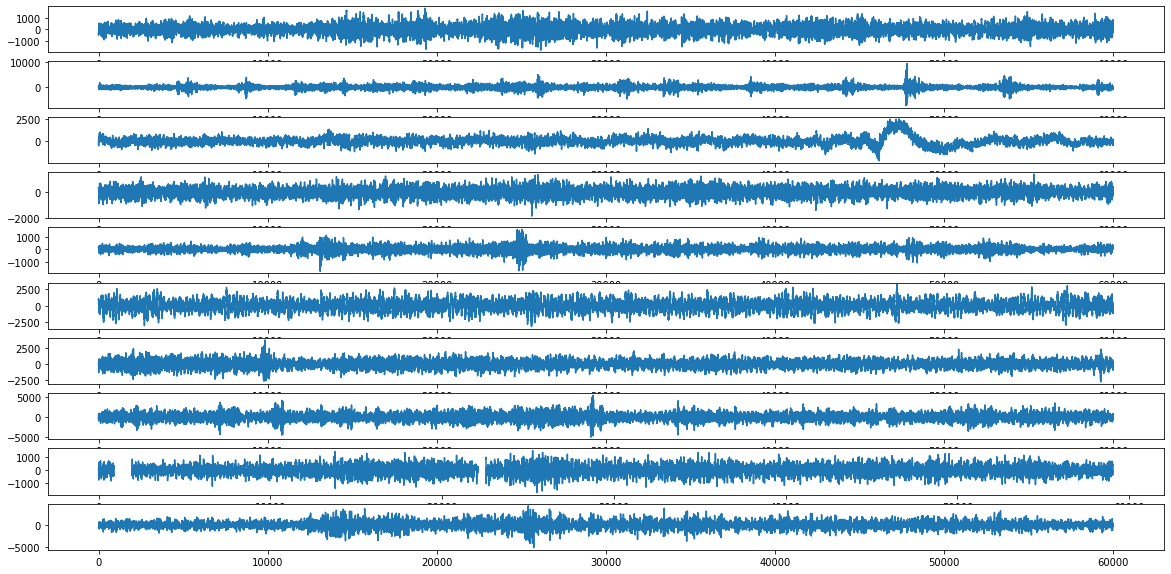

In [ ]:
#plotting the distribution of sensor values inside a segment
j=0
for i in sen:
  j+=1
  plt.subplot(10,1,j)
  plt.plot(df1[i])
  plt.gcf().set_size_inches((20, 10))

### Observations:
* There 4431 files in the train folder 
  * Common id is the name of the file and the segment_id
  * There is only 2 columns in thd csv file segment_id and time to eruption
* No missing segment_id in the train.csv
* There are no repeatation segments 
  * We checked for repeatation since value_counts showed 2 same values for time to eruption but prooved to be wrong
* There  are empty sensor_ids as well as empty rows with in non empty sensor_id in a segment
* Observations vary drastically with different sensors

## Part 3 : Time Domain Analysis And Features

In [ ]:
quantiles=[]
for i in range(0,100,25):
  val=df.time_to_eruption
  val=sorted(val)
  quantiles.append(val[int(len(val)*i/100)])

In [ ]:
quantiles.append(val[4430])

In [ ]:
df_q=[]
for i in quantiles:
  df_q.append(list(df.segment_id[df.time_to_eruption==i]))

In [ ]:
df_q

[[601524801], [525412783], [1019052648], [902114155], [1923243961]]

In [ ]:
df_q1=[]
for i in range(0,len(df_q)):
   df_q[i]= df_q[i][0]

In [ ]:
print(df_q)

[601524801, 525412783, 1019052648, 902114155, 1923243961]


In [ ]:
sensor=['sensor_1','sensor_4','sensor_7','sensor_10']

### Signal Plot And Analysis

**********************************************************************sensor_1**********************************************************************


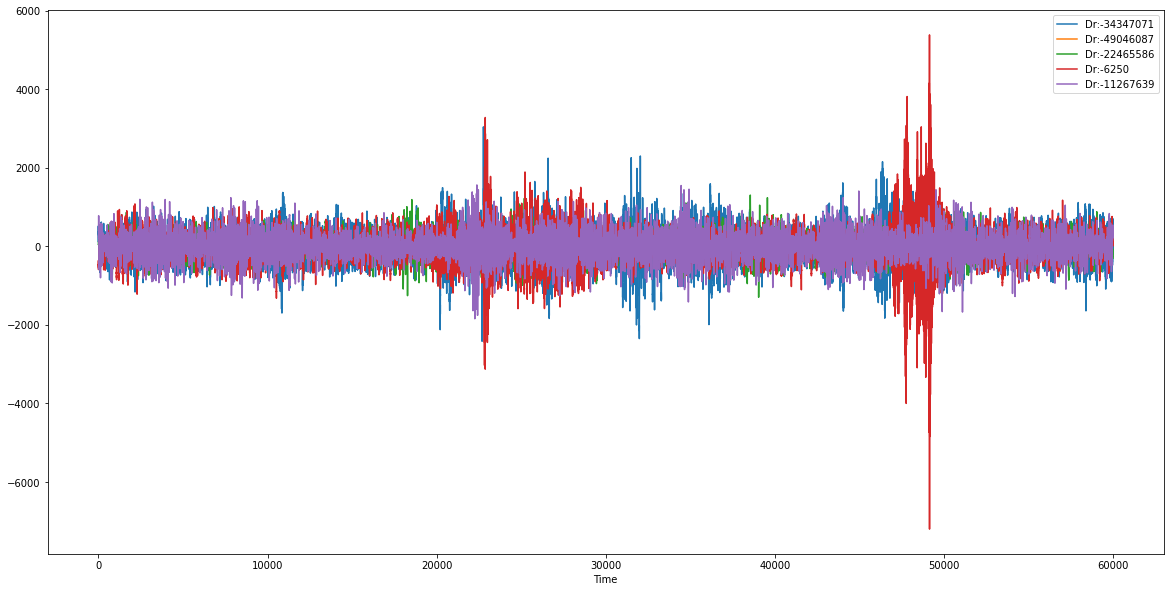

In [ ]:
# plotting the signals of sensor1 in quantiles
# https://stackoverflow.com/questions/14826119/multiple-legends-in-matplotlib-in-for-loop
print("*"*70+"sensor_1"+"*"*70)
for path in all_paths:
  if int(path.name.split('.')[0]) in df_q:
      c=0
      dfa=pd.read_csv(path)
      sd=dfa.columns.values
      for i in sd:
        if i == 'sensor_1':
          c+=1
          plt.plot(dfa[i],label="Dr:-{}".format(df.time_to_eruption.values[df.segment_id == int(path.name.split('.')[0])][0]))
          plt.gcf().set_size_inches((20, 10))
          plt.legend() 
          plt.xlabel("Time")

**********************************************************************sensor_4**********************************************************************


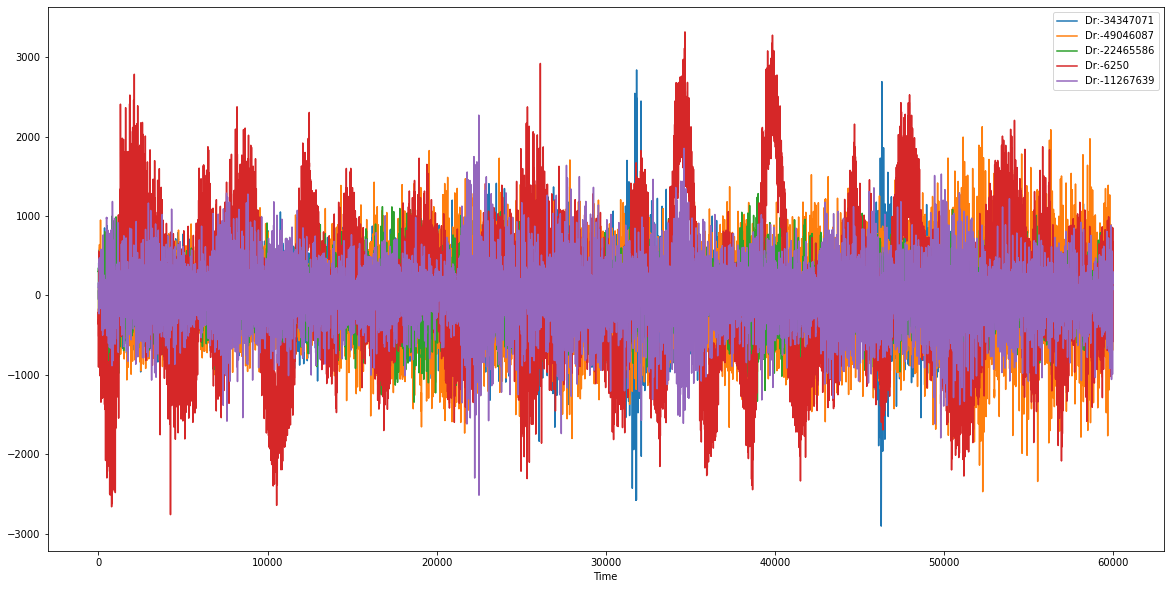

In [ ]:
# plotting the signals of sensor4 in quantiles
print("*"*70+"sensor_4"+"*"*70)
for path in all_paths:
  if int(path.name.split('.')[0]) in df_q:
      c=0
      dfa=pd.read_csv(path)
      sd=dfa.columns.values
      for i in sd:
        if i == 'sensor_4':
          c+=1
          plt.plot(dfa[i],label="Dr:-{}".format(df.time_to_eruption.values[df.segment_id == int(path.name.split('.')[0])][0]))
          plt.gcf().set_size_inches((20, 10))
          plt.legend() 
          plt.xlabel("Time")

**********************************************************************sensor_7**********************************************************************


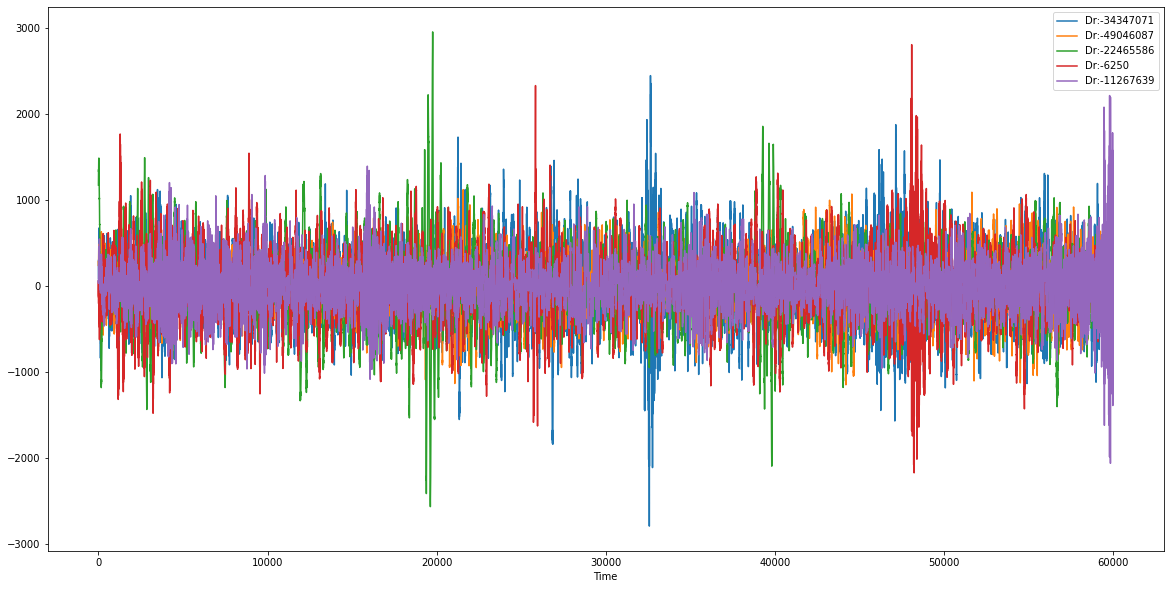

In [ ]:
# plotting the signals of sensor7 in quantiles
print("*"*70+"sensor_7"+"*"*70)
for path in all_paths:
  if int(path.name.split('.')[0]) in df_q:
      c=0
      dfa=pd.read_csv(path)
      sd=dfa.columns.values
      for i in sd:
        if i == 'sensor_7':
          c+=1
          plt.plot(dfa[i],label="Dr:-{}".format(df.time_to_eruption.values[df.segment_id == int(path.name.split('.')[0])][0]))
          plt.gcf().set_size_inches((20, 10))
          plt.legend() 
          plt.xlabel("Time")

**********************************************************************sensor_10**********************************************************************


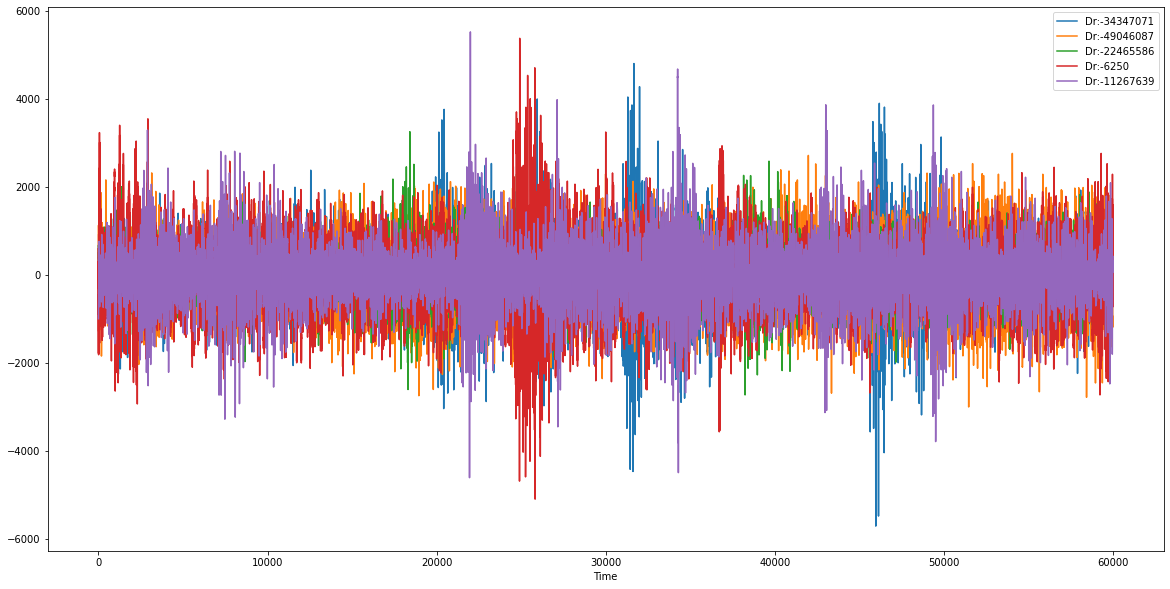

In [ ]:
# plotting the signals of sensor10 in quantiles
print("*"*70+"sensor_10"+"*"*70)
for path in all_paths:
  if int(path.name.split('.')[0]) in df_q:
      c=0
      dfa=pd.read_csv(path)
      sd=dfa.columns.values
      for i in sd:
        if i == 'sensor_10':
          c+=1
          plt.plot(dfa[i],label="Dr:-{}".format(df.time_to_eruption.values[df.segment_id == int(path.name.split('.')[0])][0]))
          plt.gcf().set_size_inches((20, 10))
          plt.legend() 
          plt.xlabel("Time")

#### Observations
* We can notice there are empty or no sensor readings in soe cases
* The signals appear very disordered with lower time to erupt
* Generally the magnitude of signal is appearing to be more uniform and less magnitude in higher time to eruption
* There are sudden spikes and disoriented structure at lower time to eruption
  * May be these spikes indicate any abnormal activities

So lets checkout the mean of time domain to varify any assumptions

### Time Domain Mean Analysis

Here I am plotting the mean of the signals across 10 sensors wrt to time to eruption

In [ ]:
# Analysing mean:
#set value in rows and columns data frame https://stackoverflow.com/questions/12100497/pandas-set-values-with-row-col-indices
Y=pd.DataFrame()
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  Y.loc[segment_id,'segment_id']=segment_id
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy()
    Y.loc[segment_id,'{}_mean'.format(i)]=np.mean(s_arr)

In [ ]:
Y['segment_id']=Y['segment_id'].astype(int)

In [ ]:
Y= pd.merge(Y, df, on='segment_id', how='left')

In [ ]:
Y

,segment_id,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,sensor_5_mean,sensor_6_mean,sensor_7_mean,sensor_8_mean,sensor_9_mean,sensor_10_mean,time_to_eruption
0,698305523,3.340894,2.320078,0.000000,-2.003533,-0.304062,15.773404,-7.795037,0.642506,0.000000,1.194497,13903256
1,1191644191,-2.753571,-0.138581,-56.797587,-0.796253,-0.056449,15.309428,7.071365,5.142648,0.217380,10.115815,5525566
2,1403440092,-1.597007,-0.168347,-3.212880,0.194447,-0.891152,2.005050,1.301928,1.617540,0.330311,0.508975,4524342
3,544830679,1.524975,-2.351744,0.000000,-4.599640,-0.161647,16.780337,-1.721421,9.427410,0.000000,1.013300,19863157
4,1313680478,2.027466,-3.089165,0.983000,-1.034333,0.292595,0.499592,3.650539,0.452592,0.209630,-4.714538,14951435
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2016361594,8.437159,1.418093,-29.150547,3.351661,1.410010,7.328478,10.339361,-10.357511,-5.072249,-5.970100,36335121
4427,1904612417,-1.403027,0.000000,1.509808,0.676105,0.778754,-0.907568,0.882219,0.000000,-0.986800,-5.036499,3819695
4428,1098612833,5.887802,-1.587740,-3.456759,3.740754,0.000000,-0.572390,-3.184230,-1.016016,-5.077132,-3.768687,32331124
4429,512339405,-3.102165,6.386960,-1.775620,3.079565,0.000000,1.449843,-0.304862,0.814036,-4.984334,8.314195,24993068


In [ ]:
Y = Y.sort_values(by = 'time_to_eruption') 

In [ ]:
Y

,segment_id,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,sensor_5_mean,sensor_6_mean,sensor_7_mean,sensor_8_mean,sensor_9_mean,sensor_10_mean,time_to_eruption
3735,601524801,3.592257,0.000000,0.000000,33.990850,1.016116,5.575140,-3.138014,0.000000,-0.545258,-0.906685,6250
1409,1658693785,0.083549,3.642189,-2.620840,-3.519941,0.522858,0.302012,-4.831986,1.416543,3.008033,3.804337,25730
2533,1957235969,4.025400,8.322628,-5.339078,-2.499042,0.819303,3.337494,-1.000717,-4.431059,2.054416,13.481109,26929
2954,442994108,1.024150,-0.992600,-0.788520,-0.800137,0.464809,4.027766,0.164681,2.937834,1.479642,-0.343578,28696
3320,1626437563,-2.370710,0.638556,6.194080,2.446059,5.895868,0.488225,0.039516,10.417543,0.818936,10.562441,40492
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1162128945,0.000000,-5.032149,-4.466059,-5.475525,0.000000,-7.635273,-9.643939,5.781120,0.581590,-1.776704,48387290
1761,1131527270,0.000000,-11.867502,-0.824636,-2.994250,0.000000,1.834986,-2.854202,4.761137,1.593307,-1.489509,48522449
2046,356854390,0.000000,-6.604140,0.018016,-0.570507,0.000000,5.524541,-0.888535,6.622806,0.897502,4.432793,48727004
890,1552761888,0.000000,-8.815353,-3.521975,1.853086,0.000000,1.221030,1.482342,3.250662,1.231429,-6.678772,48814294


In [ ]:
mean_id=["sensor_1_mean","sensor_2_mean","sensor_3_mean","sensor_4_mean","sensor_5_mean","sensor_6_mean","sensor_7_mean","sensor_8_mean","sensor_9_mean","sensor_10_mean"]

In [ ]:
dpvp=pd.DataFrame()

In [ ]:
for j in mean_id:
    dpvp[ '300_avg_{}'.format(j) ] = Y[j].rolling( 300).mean() 

In [ ]:
dpvp["time_to_eruption"]=Y["time_to_eruption"]

In [ ]:
dpvp

,300_avg_sensor_1_mean,300_avg_sensor_2_mean,300_avg_sensor_3_mean,300_avg_sensor_4_mean,300_avg_sensor_5_mean,300_avg_sensor_6_mean,300_avg_sensor_7_mean,300_avg_sensor_8_mean,300_avg_sensor_9_mean,300_avg_sensor_10_mean,time_to_eruption
3735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6250
1409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25730
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26929
2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28696
3320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40492
...,...,...,...,...,...,...,...,...,...,...,...
186,0.256766,-0.057640,-0.064872,-0.059827,0.016718,0.289284,-0.346665,0.438631,-0.046140,-0.751113,48387290
1761,0.254205,-0.104843,-0.067621,-0.078703,0.015889,0.330494,-0.360611,0.466885,-0.042694,-0.647496,48522449
2046,0.255353,-0.128655,-0.069703,-0.073424,0.013691,0.342796,-0.371881,0.484699,-0.039783,-0.629795,48727004
890,0.264131,-0.137485,-0.063060,-0.066965,0.007002,0.345292,-0.383827,0.512212,-0.031347,-0.642553,48814294


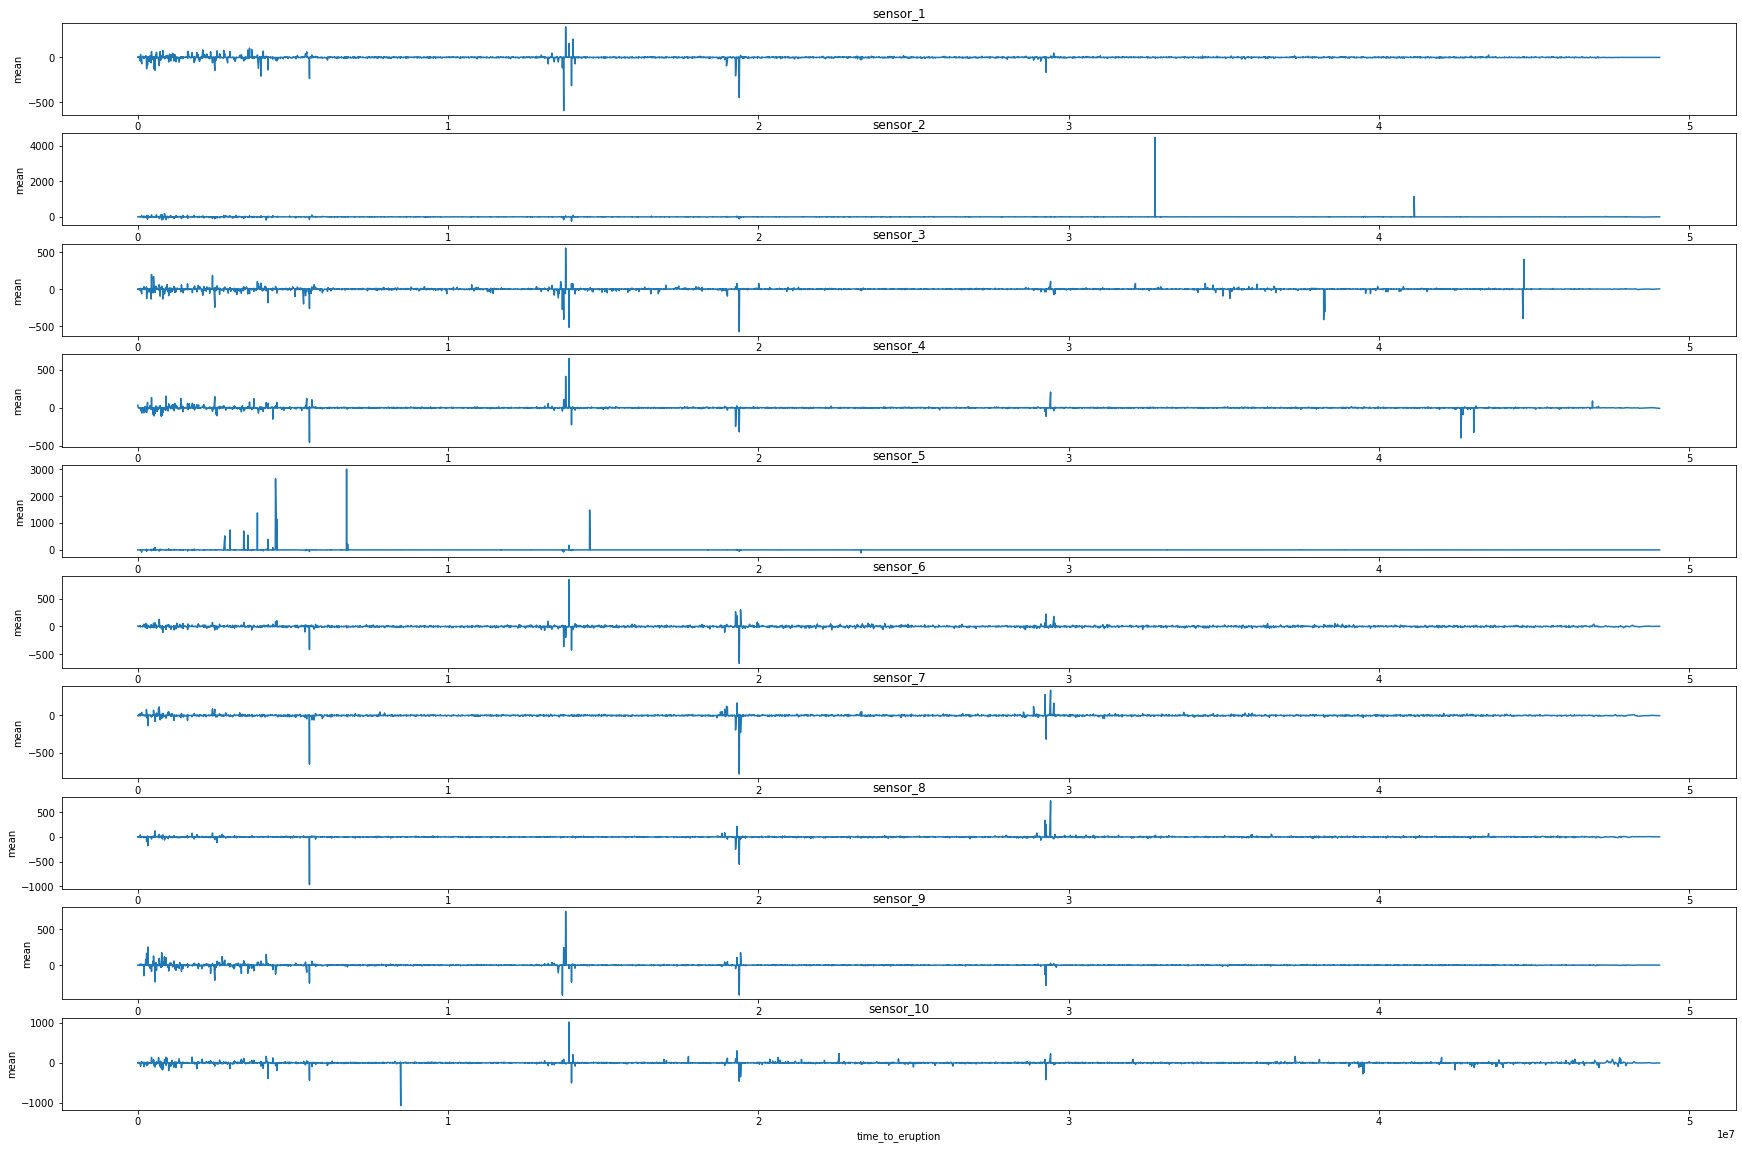

In [ ]:
j=0
for i in range(1,11):
  j+=1
  plt.subplot(10,1,j)
  plt.plot(Y["time_to_eruption"],Y.iloc[:,i])
  plt.gcf().set_size_inches((30,20)) 
  plt.title("sensor_{}".format(i))
  plt.ylabel("mean")
  plt.xlabel("time_to_eruption")
plt.show()

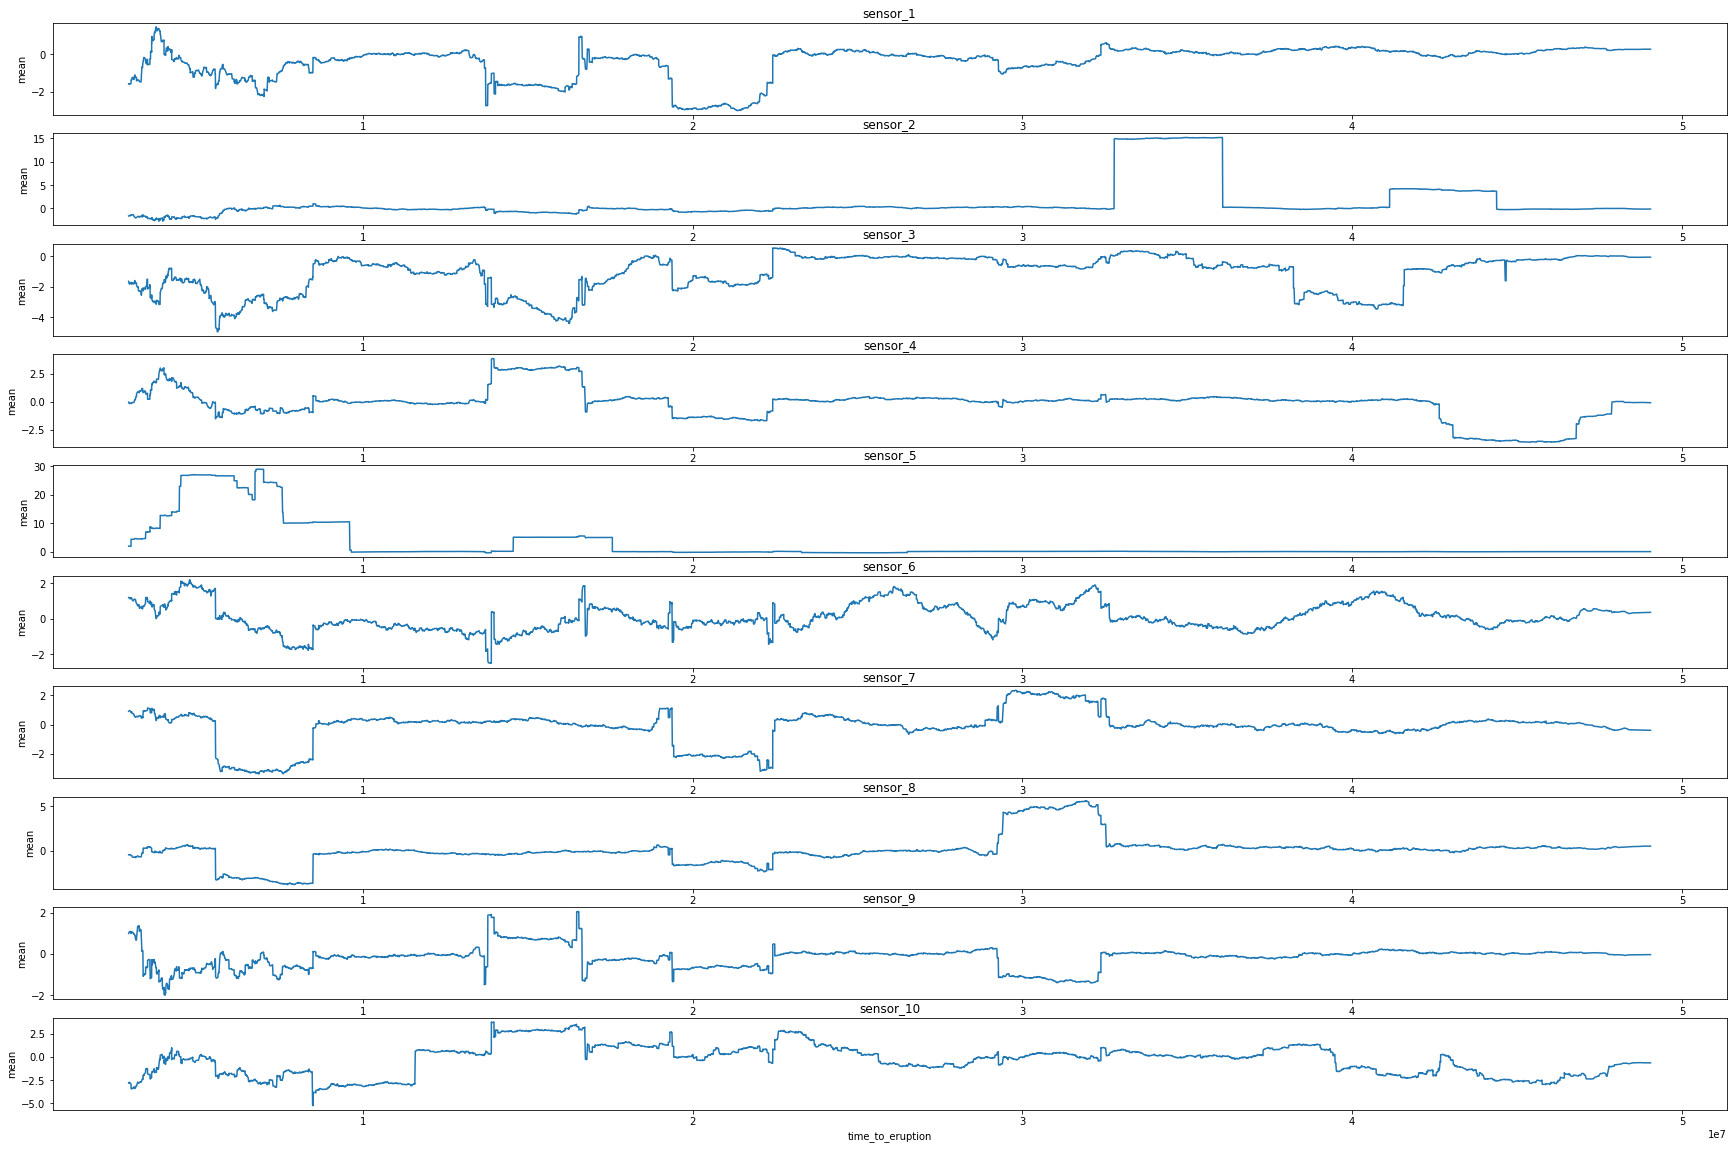

In [ ]:
j=0
for i in range(0,10):
  j+=1
  plt.subplot(10,1,j)
  plt.plot(dpvp["time_to_eruption"],dpvp.iloc[:,i])
  plt.gcf().set_size_inches((30,20)) 
  plt.title("sensor_{}".format(i+1))
  plt.ylabel("mean")
  plt.xlabel("time_to_eruption")
plt.show()

#### Observations
* The means are mostly centered in 0 indicating a symmetry of values across either side of zeroes
* There are few exception points across the sensors may be due to outliers or abnormal conditions.
* The graph appears smoother towards the end almost confirming ourassumtion that as time to eruption increases the signal is smoother
* There are variations in mean closer to the start indicating the sudden spikes in the signal. This might be an indication of abnormal phenomenon
* Some sensors are smoother than others ma be indicating that they might be further away from the vicinity of volcano

This indicates that the use of statistical features like mean, stDeviation, max, quantiles could help us in determining the time to eruption in some ways

### Time Domain Statistical Features

Ref:https://www.kaggle.com/muhakabartay/ingv-volcano-eda-with-lgbm

In [ ]:
# Calculating various features
X=pd.DataFrame()
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy()
    #sum of signal values
    X.loc[segment_id,'{}_sum'.format(i)]=np.sum(s_arr)
    #mean of signal values
    X.loc[segment_id,'{}_mean'.format(i)]=np.mean(s_arr)
    #max of signal values
    X.loc[segment_id,'{}_max'.format(i)]=np.max(s_arr)
    #min of signal values
    X.loc[segment_id,'{}_min'.format(i)]=np.min(s_arr)
    #std of signal values
    X.loc[segment_id,'{}_std'.format(i)]=np.std(s_arr)
    #difference between min and maximum
    X.loc[segment_id,'{}_diff_min_max'.format(i)]=np.max(s_arr)-abs(np.min(s_arr))
    #difference between min and mean
    X.loc[segment_id,'{}_diff_mean_max'.format(i)]=np.max(s_arr)-abs(np.mean(s_arr))
    #quantile values
    X.loc[segment_id,'{}_quantile25'.format(i)]=np.quantile(s_arr,.25)
    X.loc[segment_id,'{}_quantile50'.format(i)]=np.quantile(s_arr,.50)
    X.loc[segment_id,'{}_quantile75'.format(i)]=np.quantile(s_arr,.75)
    X.loc[segment_id,'{}_quantile99'.format(i)]=np.quantile(s_arr,.99)
    # mean of few intervals
    X.loc[segment_id,'{}_mean_10000'.format(i)]=np.mean(s_arr[:10000])
    X.loc[segment_id,'{}_mean_10000l'.format(i)]=np.mean(s_arr[-10000:])
    X.loc[segment_id,'{}_std_10000'.format(i)]=np.std(s_arr[:10000])
    X.loc[segment_id,'{}_std_10000l'.format(i)]=np.std(s_arr[-10000:])

In [ ]:
X

,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,sensor_3_quantile75,...,sensor_8_diff_min_max,sensor_8_diff_mean_max,sensor_8_quantile25,sensor_8_quantile50,sensor_8_quantile75,sensor_8_quantile99,sensor_8_mean_10000,sensor_8_mean_10000l,sensor_8_std_10000,sensor_8_std_10000l,sensor_9_sum,sensor_9_mean,sensor_9_max,sensor_9_min,sensor_9_std,sensor_9_diff_min_max,sensor_9_diff_mean_max,sensor_9_quantile25,sensor_9_quantile50,sensor_9_quantile75,sensor_9_quantile99,sensor_9_mean_10000,sensor_9_mean_10000l,sensor_9_std_10000,sensor_9_std_10000l,sensor_10_sum,sensor_10_mean,sensor_10_max,sensor_10_min,sensor_10_std,sensor_10_diff_min_max,sensor_10_diff_mean_max,sensor_10_quantile25,sensor_10_quantile50,sensor_10_quantile75,sensor_10_quantile99,sensor_10_mean_10000,sensor_10_mean_10000l,sensor_10_std_10000,sensor_10_std_10000l
698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,105.0,2626.357494,-447.0,0.0,450.0,1496.0,-7.6955,5.6142,781.168858,590.284228,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.000000,71671.0,1.194497,5170.0,-5564.0,660.964365,-394.0,5168.805503,-365.0,0.0,365.0,1796.0,29.1917,11.9652,720.404150,512.453582
1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,733.0,...,-914.0,2501.857352,-548.0,0.0,574.0,1829.0,6.6718,1.3334,895.903911,796.063724,13043.0,0.217380,3274.0,-3605.0,673.302147,-331.0,3273.782620,-419.0,0.0,426.0,1627.0,-0.2616,-0.3269,676.024884,695.808773,606959.0,10.115815,5607.0,-5668.0,900.156764,-61.0,5596.884185,-559.0,0.0,578.0,2212.0,15.5931,10.6105,1007.413430,783.506843
1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,159.0,...,22.0,1638.382460,-304.0,0.0,310.0,1008.0,0.7397,4.0490,461.762708,448.019383,19819.0,0.330311,2008.0,-1913.0,292.526161,95.0,2007.669689,-179.0,0.0,181.0,709.0,-2.8405,-0.0561,284.688541,245.991332,30539.0,0.508975,5328.0,-4977.0,644.211856,351.0,5327.491025,-373.0,0.0,383.0,1631.0,-101.8127,-88.5912,603.296180,525.088396
544830679,91500.0,1.524975,2911.0,-2559.0,549.341607,352.0,2909.475025,-346.0,0.0,358.0,1321.0,4.4282,3.8031,484.721809,668.482177,-141107.0,-2.351744,7192.0,-6206.0,459.389717,986.0,7189.648256,-194.0,0.0,191.0,1304.0,19.0026,-3.5717,313.051286,586.689116,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,-944.0,3092.572590,-611.0,0.0,639.0,2128.0,5.4861,22.1987,852.604372,981.968622,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.000000,60799.0,1.013300,4788.0,-4388.0,678.558668,400.0,4786.986700,-386.0,

### Zero Crossing Rate

Zero Crossing Rate refers to  number of time the signal cross from positive to zero to negative and from Negative to zero to positive. It can help us to calculate an approximate frequency or pitch of the signal

In [ ]:
Y=pd.DataFrame()
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  Y.loc[segment_id,'segment_id']=segment_id
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy()
    # Here we are  calculating the number of times the product of left and right shifted array
    #Arr      =[-1,2,3,4]
    #Arr[1:]  =[2,3,4]
    #Arr[:-1] =[-1,2,3]
    #Ref:https://stackoverflow.com/questions/30272538/python-code-for-counting-number-of-zero-crossings-in-an-array
    Y.loc[segment_id,'{}_ZCR'.format(i)]=(((s_arr[:-1]*s_arr[1:])<0).sum()) 

In [ ]:
Y['segment_id']=Y['segment_id'].astype(int)
Y= pd.merge(Y, df, on='segment_id', how='left')

In [ ]:
Y

,segment_id,sensor_1_ZCR,sensor_2_ZCR,sensor_3_ZCR,sensor_4_ZCR,sensor_5_ZCR,sensor_6_ZCR,sensor_7_ZCR,sensor_8_ZCR,sensor_9_ZCR,sensor_10_ZCR,time_to_eruption
0,698305523,1641.0,6732.0,0.0,3383.0,7289.0,2041.0,1004.0,3856.0,0.0,2686.0,13903256
1,1191644191,8565.0,10998.0,3727.0,9985.0,330.0,1307.0,687.0,1778.0,13142.0,2190.0,5525566
2,1403440092,2047.0,6541.0,3242.0,2692.0,6109.0,2442.0,1285.0,6026.0,2577.0,2444.0,4524342
3,544830679,1853.0,5974.0,0.0,1756.0,6376.0,2683.0,2923.0,3167.0,0.0,2115.0,19863157
4,1313680478,2325.0,6174.0,3410.0,4080.0,6175.0,3487.0,1809.0,11069.0,3236.0,3186.0,14951435
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2016361594,3785.0,12099.0,6490.0,4489.0,7437.0,4429.0,1983.0,2777.0,6231.0,5069.0,36335121
4427,1904612417,2461.0,0.0,2143.0,3761.0,6211.0,3640.0,4618.0,0.0,5022.0,3395.0,3819695
4428,1098612833,3330.0,5760.0,2566.0,3434.0,0.0,42043.0,5187.0,8745.0,2797.0,2970.0,32331124
4429,512339405,2364.0,5528.0,2786.0,3144.0,0.0,41903.0,5435.0,6919.0,3013.0,2892.0,24993068


In [ ]:
Y = Y.sort_values(by = 'time_to_eruption') 

In [ ]:
zcr_id=['sensor_1_ZCR', 'sensor_2_ZCR', 'sensor_3_ZCR','sensor_4_ZCR', 'sensor_5_ZCR', 'sensor_6_ZCR', 'sensor_7_ZCR','sensor_8_ZCR', 'sensor_9_ZCR', 'sensor_10_ZCR', 'time_to_eruption']

In [ ]:
dpvp=pd.DataFrame()

In [ ]:
for j in zcr_id:
    dpvp[ '300_avg_{}'.format(j) ] = Y[j].rolling( 300).mean() 

In [ ]:
dpvp["time_to_eruption"]=Y["time_to_eruption"]

In [ ]:
dpvp

,300_avg_sensor_1_ZCR,300_avg_sensor_2_ZCR,300_avg_sensor_3_ZCR,300_avg_sensor_4_ZCR,300_avg_sensor_5_ZCR,300_avg_sensor_6_ZCR,300_avg_sensor_7_ZCR,300_avg_sensor_8_ZCR,300_avg_sensor_9_ZCR,300_avg_sensor_10_ZCR,300_avg_time_to_eruption,time_to_eruption
3735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6250
1409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25730
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26929
2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28696
3320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40492
...,...,...,...,...,...,...,...,...,...,...,...,...
186,5453.973333,6053.416667,3382.060000,5019.090000,5841.160000,5668.540000,4165.726667,7389.420000,3277.050000,3286.950000,4.527364e+07,48387290
1761,5433.380000,6049.743333,3390.880000,5017.640000,5820.123333,5665.963333,4149.546667,7386.576667,3276.173333,3288.573333,4.529145e+07,48522449
2046,5415.743333,6031.903333,3385.913333,5007.176667,5753.773333,5653.163333,4130.956667,7379.226667,3266.530000,3287.773333,4.530991e+07,48727004
890,5370.256667,6030.870000,3384.560000,5001.896667,5700.593333,5654.510000,4127.750000,7381.593333,3267.550000,3269.780000,4.532863e+07,48814294


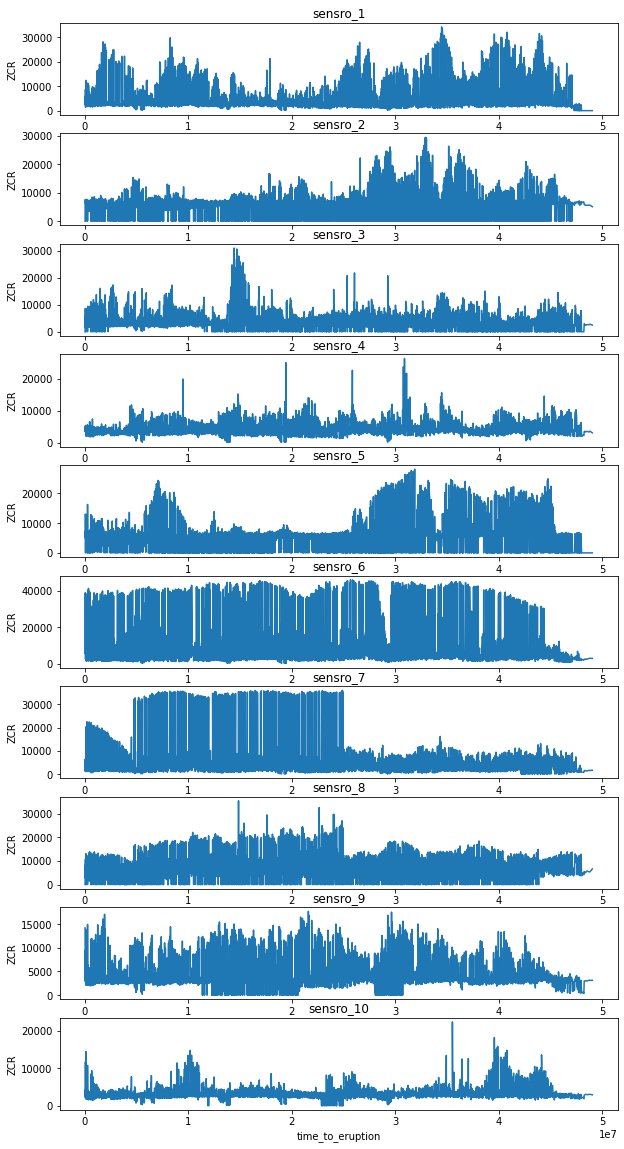

In [ ]:
j=0
for i in range(1,11):
  j+=1
  plt.subplot(10,1,j)
  plt.plot(Y["time_to_eruption"],Y.iloc[:,i])
  plt.gcf().set_size_inches((10,20)) 
  plt.title("sensro_{}".format(i))
  plt.ylabel("ZCR")
  plt.xlabel("time_to_eruption")
plt.show()

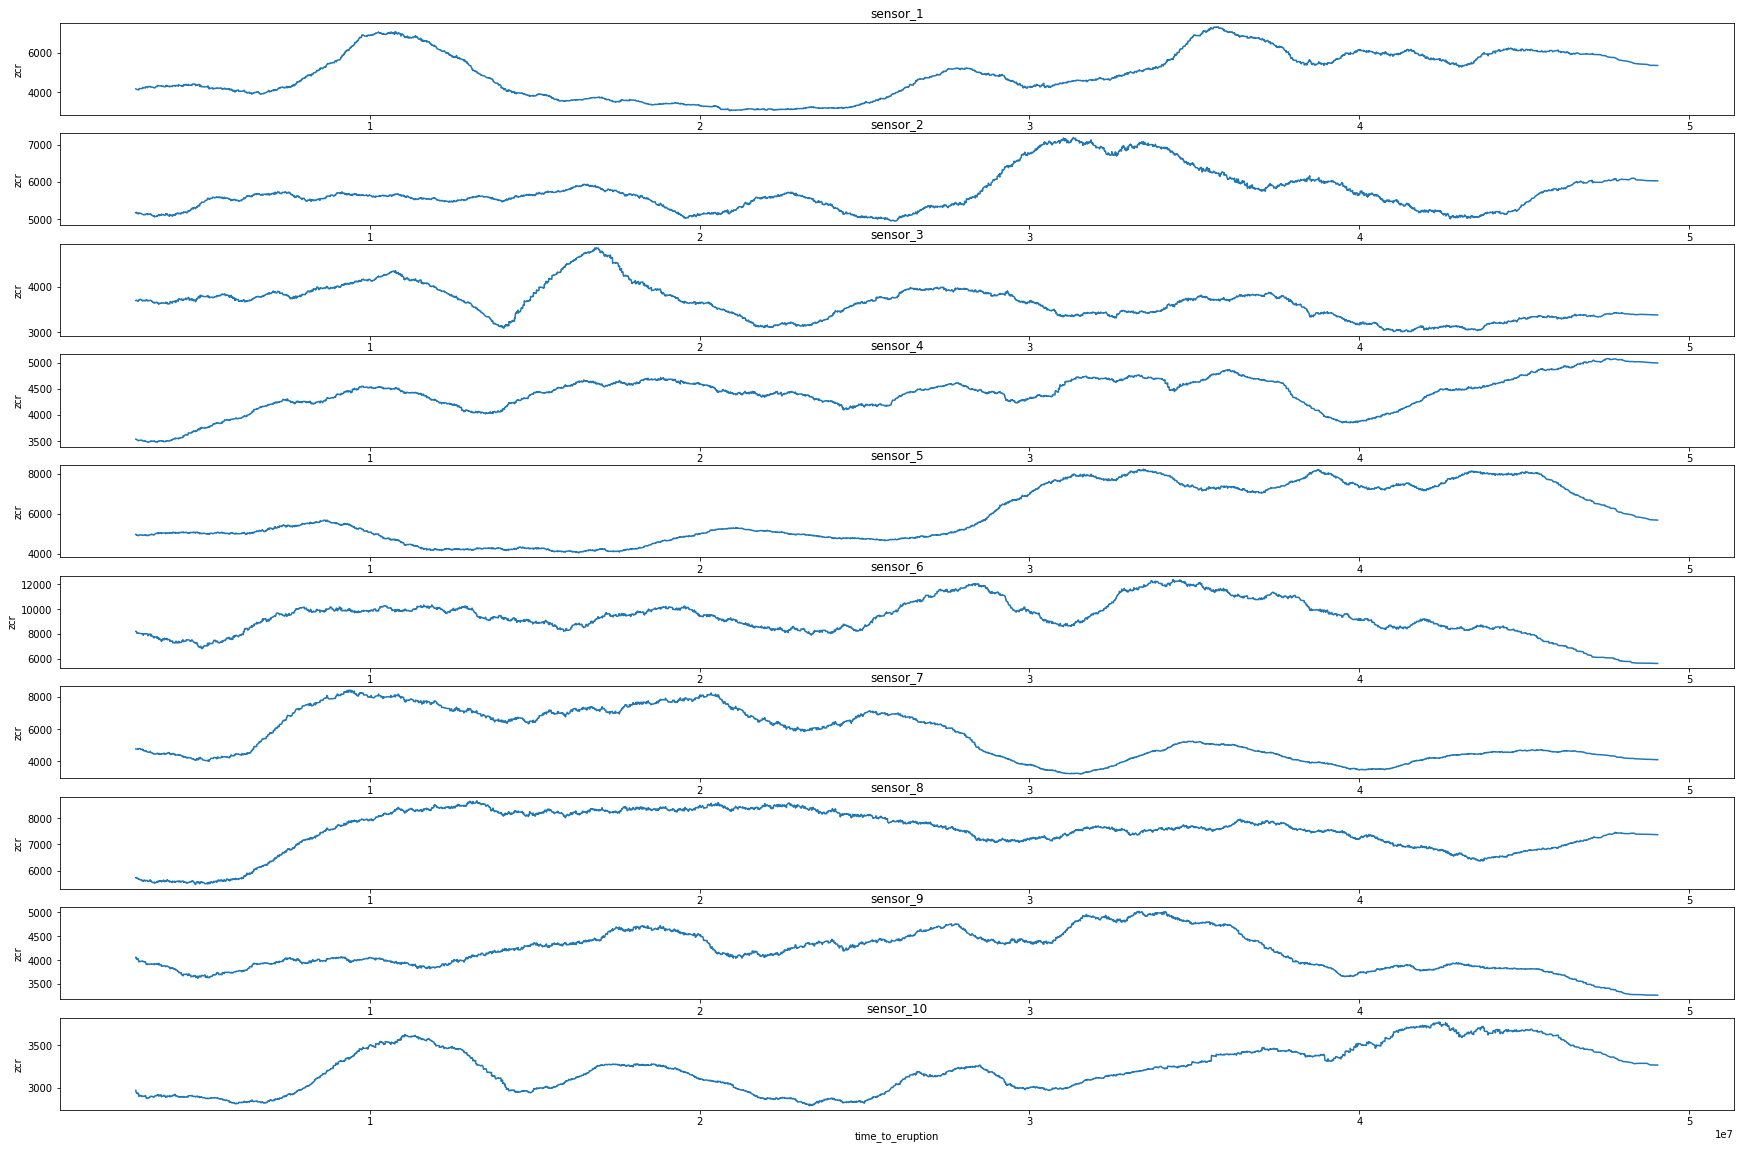

In [ ]:
j=0
for i in range(0,10):
  j+=1
  plt.subplot(10,1,j)
  plt.plot(dpvp["time_to_eruption"],dpvp.iloc[:,i])
  plt.gcf().set_size_inches((30,20)) 
  plt.title("sensor_{}".format(i+1))
  plt.ylabel("zcr")
  plt.xlabel("time_to_eruption")
plt.show()

Observations:

There is no clear pattern recognizable in ZCR But a clear variance in pattern with timecan be noticed in the some of the sensors. Which proves it to be good feature

### Root Mean Square Energy

We are using this method to calculate the energy available in a wave and to check how it varies as the time to eruption increases.

It gives us an idea regarding the energy stored in a Signal

In [ ]:
Y=pd.DataFrame()
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  Y.loc[segment_id,'segment_id']=segment_id
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy()
    # As the name suggest we are taking the root mean of the sum squared amplitudes
    Y.loc[segment_id,'{}_RMSE'.format(i)]=np.sqrt(np.mean(np.square(s_arr))) 

In [ ]:
Y['segment_id']=Y['segment_id'].astype(int)
Y= pd.merge(Y, df, on='segment_id', how='left')

In [ ]:
Y

,segment_id,sensor_1_ZCR,sensor_2_ZCR,sensor_3_ZCR,sensor_4_ZCR,sensor_5_ZCR,sensor_6_ZCR,sensor_7_ZCR,sensor_8_ZCR,sensor_9_ZCR,sensor_10_ZCR,time_to_eruption
0,698305523,1641.0,6732.0,0.0,3383.0,7289.0,2041.0,1004.0,3856.0,0.0,2686.0,13903256
1,1191644191,8565.0,10998.0,3727.0,9985.0,330.0,1307.0,687.0,1778.0,13142.0,2190.0,5525566
2,1403440092,2047.0,6541.0,3242.0,2692.0,6109.0,2442.0,1285.0,6026.0,2577.0,2444.0,4524342
3,544830679,1853.0,5974.0,0.0,1756.0,6376.0,2683.0,2923.0,3167.0,0.0,2115.0,19863157
4,1313680478,2325.0,6174.0,3410.0,4080.0,6175.0,3487.0,1809.0,11069.0,3236.0,3186.0,14951435
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2016361594,3785.0,12099.0,6490.0,4489.0,7437.0,4429.0,1983.0,2777.0,6231.0,5069.0,36335121
4427,1904612417,2461.0,0.0,2143.0,3761.0,6211.0,3640.0,4618.0,0.0,5022.0,3395.0,3819695
4428,1098612833,3330.0,5760.0,2566.0,3434.0,0.0,42043.0,5187.0,8745.0,2797.0,2970.0,32331124
4429,512339405,2364.0,5528.0,2786.0,3144.0,0.0,41903.0,5435.0,6919.0,3013.0,2892.0,24993068


In [ ]:
Y = Y.sort_values(by = 'time_to_eruption') 

In [ ]:
rmse_id=['sensor_1_RMSE', 'sensor_2_RMSE', 'sensor_3_RMSE','sensor_4_RMSE', 'sensor_5_RMSE', 'sensor_6_RMSE', 'sensor_7_RMSE','sensor_8_RMSE', 'sensor_9_RMSE', 'sensor_10_RMSE', 'time_to_eruption']


In [ ]:
dpvp=pd.DataFrame()

In [ ]:
for j in rmse_id:
    dpvp[ '300_avg_{}'.format(j) ] = Y[j].rolling( 300).mean() 

In [ ]:
dpvp["time_to_eruption"]=Y["time_to_eruption"]

In [ ]:
dpvp

,300_avg_sensor_1_RMSE,300_avg_sensor_2_RMSE,300_avg_sensor_3_RMSE,300_avg_sensor_4_RMSE,300_avg_sensor_5_RMSE,300_avg_sensor_6_RMSE,300_avg_sensor_7_RMSE,300_avg_sensor_8_RMSE,300_avg_sensor_9_RMSE,300_avg_sensor_10_RMSE,300_avg_time_to_eruption,time_to_eruption
3735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6250
1409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25730
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26929
2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28696
3320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40492
...,...,...,...,...,...,...,...,...,...,...,...,...
186,326.732437,512.855831,246.323058,366.994120,128.654802,609.903032,412.818787,524.299603,310.494559,688.441601,4.527364e+07,48387290
1761,325.713230,515.104399,247.402133,367.220760,128.064615,608.468692,411.947552,523.149662,310.820800,688.010611,4.529145e+07,48522449
2046,325.252536,517.877044,248.038912,367.904984,127.653196,608.582123,411.653367,523.333133,311.624049,689.470145,4.530991e+07,48727004
890,323.868486,518.600637,247.903652,367.990083,127.025172,607.697118,411.181468,522.639940,311.814900,689.431200,4.532863e+07,48814294


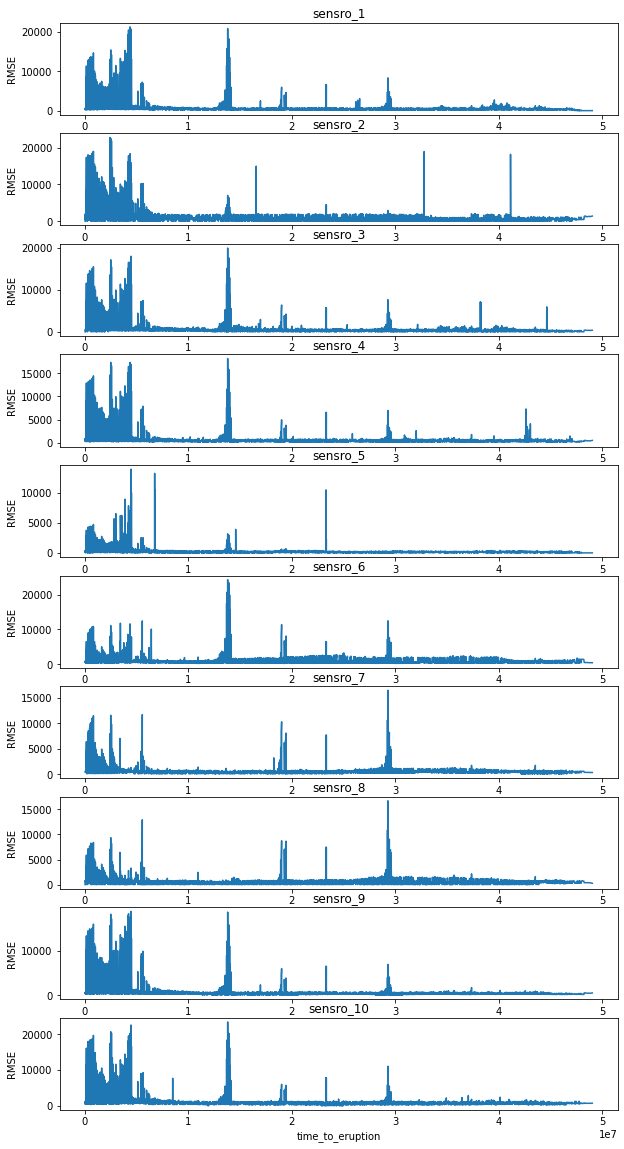

In [ ]:
j=0
for i in range(1,11):
  j+=1
  plt.subplot(10,1,j)
  plt.plot(Y["time_to_eruption"],Y.iloc[:,i])
  plt.gcf().set_size_inches((10,20)) 
  plt.title("sensro_{}".format(i))
  plt.ylabel("RMSE")
  plt.xlabel("time_to_eruption")
plt.show()

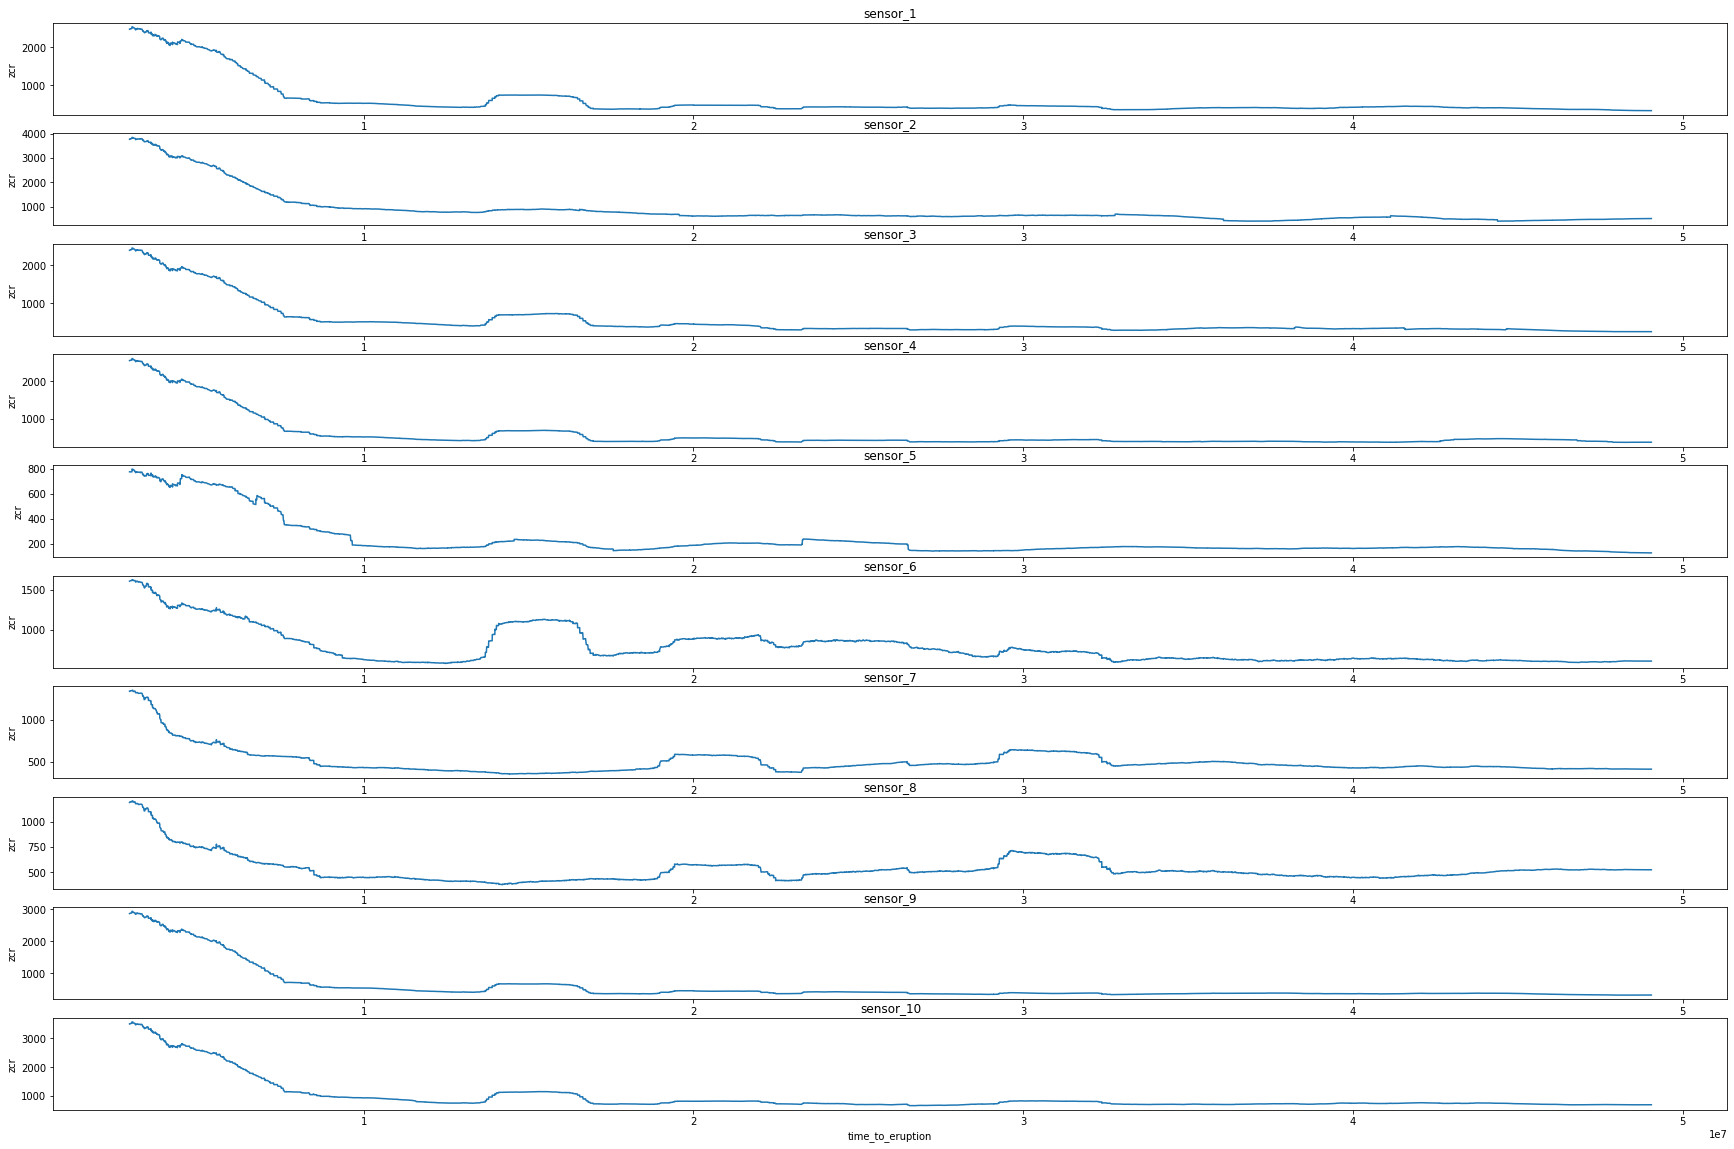

In [ ]:
j=0
for i in range(0,10):
  j+=1
  plt.subplot(10,1,j)
  plt.plot(dpvp["time_to_eruption"],dpvp.iloc[:,i])
  plt.gcf().set_size_inches((30,20)) 
  plt.title("sensor_{}".format(i+1))
  plt.ylabel("zcr")
  plt.xlabel("time_to_eruption")
plt.show()

### ZCR, RMSE, Gradient

Ref:https://www.kaggle.com/sepehrvafaei/feature-engineering-ingv-competition

In [ ]:
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy() 
    X.loc[segment_id,'{}_RMSE'.format(i)]=np.sqrt(np.mean(np.square(s_arr)))
    X.loc[segment_id,'{}_ZCR'.format(i)]=(((s_arr[:-1]*s_arr[1:])<0).sum()) 
    #We are calculating gradients to detect the changes in the signal incuding any sudden changesin the reading
    X.loc[segment_id,'{}_mean_grad'.format(i)]=np.mean(np.gradient(s_arr))

### Rolling Windows

Rolling windows are used to look for any instability in the siignal. 

Ref:https://www.kaggle.com/lovedm/basic-feature-benchmark-20191124

In [30]:
# Rolling windows technique
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    X.loc[segment_id,'{}_rolling_mean_100'.format(i)]=np.mean(dfa[i].rolling(100, win_type ='hann').sum())
    X.loc[segment_id,'{}_rolling_std_100'.format(i)]=np.std(dfa[i].rolling(100, win_type ='hann').sum())
    X.loc[segment_id,'{}_rolling_max_100'.format(i)]=np.max(dfa[i].rolling(100, win_type ='hann').sum())
    X.loc[segment_id,'{}_rolling_min_100'.format(i)]=np.min(dfa[i].rolling(100, win_type ='hann').sum())

In [31]:
X

,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,sensor_3_quantile75,...,sensor_1_rolling_mean_100,sensor_1_rolling_std_100,sensor_1_rolling_max_100,sensor_1_rolling_min_100,sensor_2_rolling_mean_100,sensor_2_rolling_std_100,sensor_2_rolling_max_100,sensor_2_rolling_min_100,sensor_3_rolling_mean_100,sensor_3_rolling_std_100,sensor_3_rolling_max_100,sensor_3_rolling_min_100,sensor_4_rolling_mean_100,sensor_4_rolling_std_100,sensor_4_rolling_max_100,sensor_4_rolling_min_100,sensor_5_rolling_mean_100,sensor_5_rolling_std_100,sensor_5_rolling_max_100,sensor_5_rolling_min_100,sensor_6_rolling_mean_100,sensor_6_rolling_std_100,sensor_6_rolling_max_100,sensor_6_rolling_min_100,sensor_7_rolling_mean_100,sensor_7_rolling_std_100,sensor_7_rolling_max_100,sensor_7_rolling_min_100,sensor_8_rolling_mean_100,sensor_8_rolling_std_100,sensor_8_rolling_max_100,sensor_8_rolling_min_100,sensor_9_rolling_mean_100,sensor_9_rolling_std_100,sensor_9_rolling_max_100,sensor_9_rolling_min_100,sensor_10_rolling_mean_100,sensor_10_rolling_std_100,sensor_10_rolling_max_100,sensor_10_rolling_min_100
698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,169.620301,12560.427735,101000.416381,-100518.814577,109.801028,7318.858618,82460.650587,-65971.628929,0.000000,0.000000,0.000000,0.000000,-101.702544,9658.821046,37860.546906,-41859.374593,-18.111054,2198.300876,25286.849071,-30101.034547,770.053448,52707.620672,165219.792330,-145440.692262,-413.937449,18213.129008,83060.769122,-68436.016554,90.522089,26553.606751,90926.196470,-90599.871335,0.000000,0.000000,0.000000,0.000000,65.655065,15043.202930,114344.945877,-115229.604770
1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,733.0,...,-127.987868,17872.470064,63185.450933,-75414.603451,-7.568476,13309.511555,162725.319550,-213930.268345,-2787.964789,56027.833712,190487.754195,-204473.438197,-66.206437,16822.822031,61979.902191,-61442.031437,-2.798846,473.047632,9352.818705,-7071.722522,751.287779,41078.410030,135828.790562,-126549.163249,372.027733,31667.498627,128111.273316,-97630.384883,206.703481,37717.767319,111428.176279,-150875.433831,52.105823,12029.097913,70767.791070,-71823.590341,499.870725,30508.686691,126078.853724,-164003.213363
1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,159.0,...,-70.539987,8400.388923,70925.556339,-57435.023158,-13.389881,5652.716551,57149.347197,-38962.240673,-150.096677,7317.215505,36723.636479,-39184.035652,19.749261,6584.465991,37627.717487,-33677.438245,-44.171727,2082.616831,26549.361167,-28961.676900,

## Part 4: Frequency Domain Analysis and Features

In the frequency domain the volcanoes are divide into 5 parts base on the source with different frequency ranges.
* Type A  (10 Hz or higher):  Earthquake caused by destruction of rocks surrounding magma chambers and conduits
* Type BH (5-8Hz) : Earthquake caused by magma intruding into the conduit and destroying the conduit and rocks around the conduit
* Type BL (1.5-2.5Hz) : An earthquake around the conduit due to gas etc. ejecting from the crater prior to the explosive eruption and reducing the pressure inside the conduit.
* Type C (0.5-1.2Hz) : Vibration due to increase in gas pressure in the cavity along with BH
* Type D (2-4Hz) : Vibration due to gas ejection along with BL

Ref :
* https://www.kaggle.com/amanooo/ingv-volcanic-basic-solution-stft
* https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
      

The following section contains an analysis of both fourier and short time fourier transform

### Spectrogram Analysis

*************************segment_id 601524801***** duration is 6250*************************


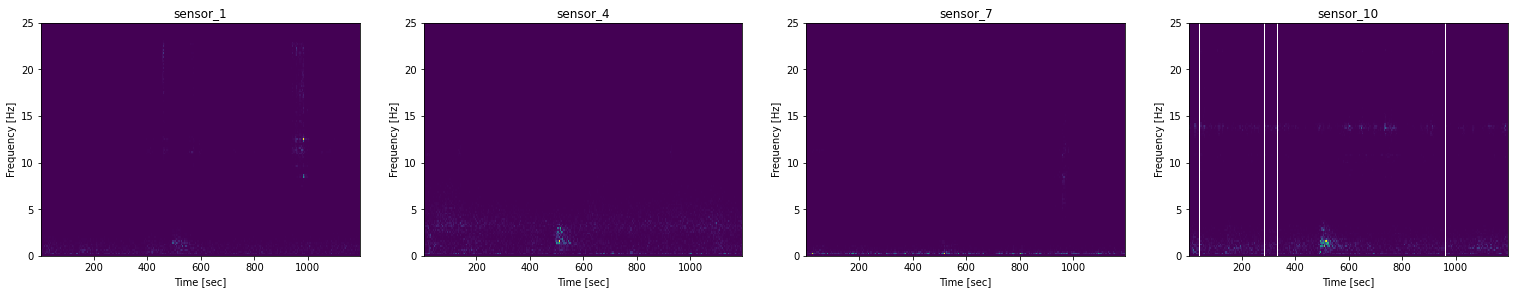

*************************segment_id 1019052648***** duration is 22465586*************************


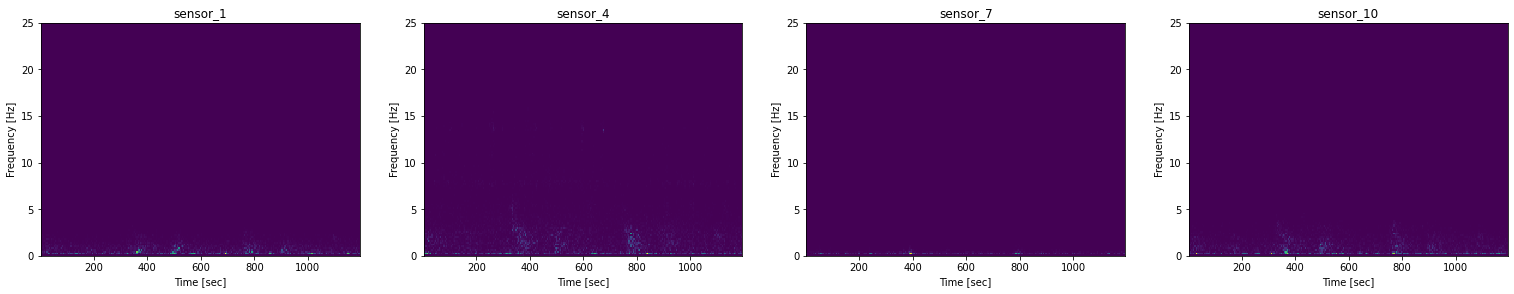

*************************segment_id 525412783***** duration is 11267639*************************


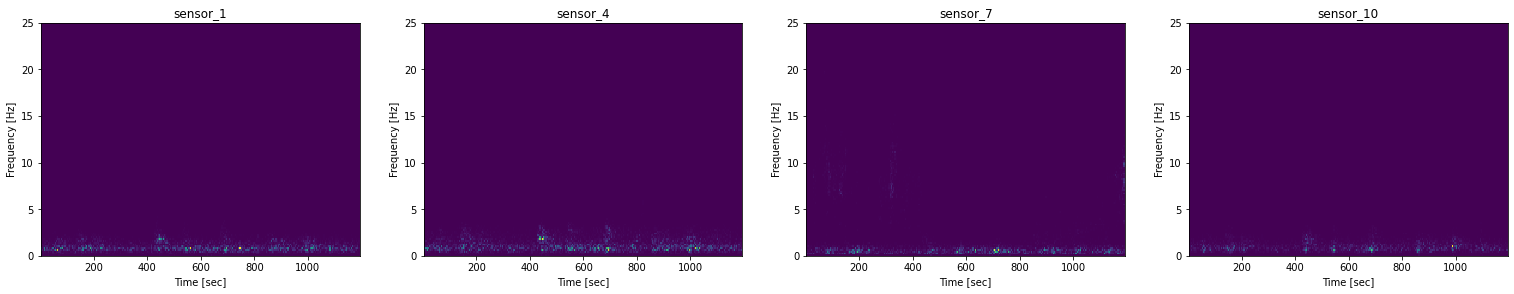

*************************segment_id 902114155***** duration is 34347071*************************


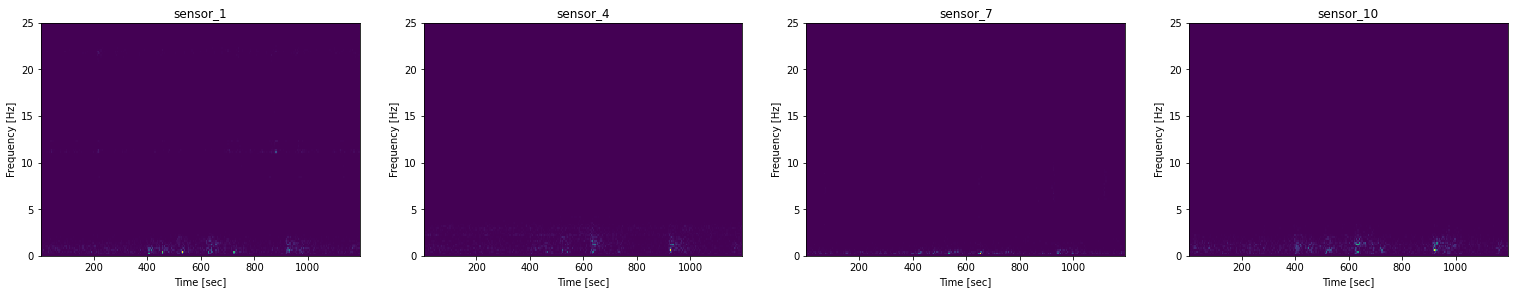

*************************segment_id 1923243961***** duration is 49046087*************************


<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


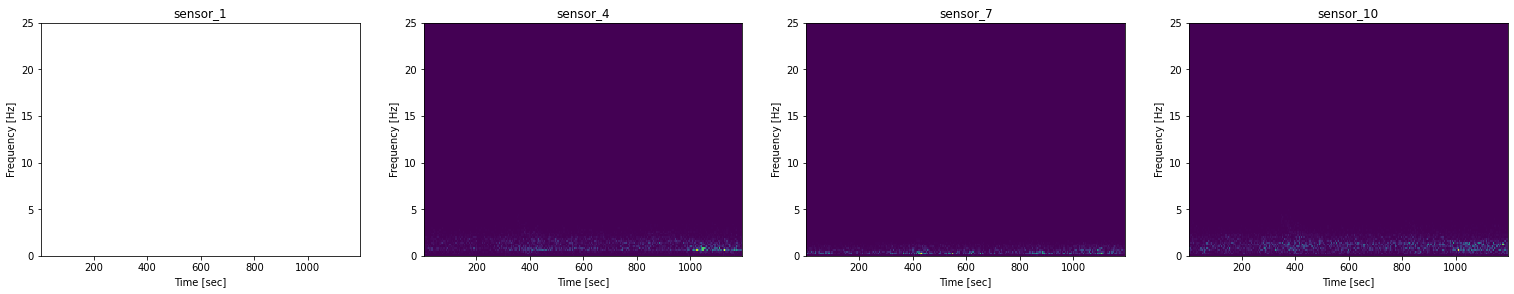

In [ ]:
# plotting the signals of 4 sensors in quantiles
for path in all_paths:
  if int(path.name.split('.')[0]) in df_q:
      c=0
      dfa=pd.read_csv(path)
      sd=dfa.columns.values
      print('*'*25 +'segment_id '+ path.name.split('.')[0]+'*'*5+' duration is {}'.format(df.time_to_eruption.values[df.segment_id == int(path.name.split('.')[0])][0]) +'*'*25)
      for i in sd:
        if i in sensor:
          c+=1
          f, t, Sxx = signal.spectrogram(dfa[i],50)
          plt.subplot(6,6,c)
          plt.pcolormesh(t, f, abs(Sxx))
          plt.gcf().set_size_inches((40, 30)) 
          plt.title(i)
          plt.ylabel('Frequency [Hz]')
          plt.xlabel('Time [sec]')
      plt.show()

#### Observations:

* The vertical white lines indicate empty observations
* These have very low frequency
* We can safely assume that the max frequency is less than ~25Hz
* Most higher amplitudes have frequency less than 5Hz
* Frequency appears slightly higher for closer time to eruption 

### Fourier Transform

From the graph we assumed that the fmax < ~ 25Hz,  so lets take fs >= 2*fmax for safety  let's take it as 100Hz in the following cases

We are calculating the following features in Frequency Domain:

Mean:  The mean of both the real and complex magnnitude

Standard Deviation:  The distribution of both the real and complex magnitude

Max: Maximum of both real and complex magnitude

Min: Minimum of both real and complex magnitude

RMSE: Root mean square amplitude of both real and complex magnitude

Spectral Centroid: Calculates the frequency at which the energy of the signal is centered on.

Spectral Rolloff: The frequency below which 85% percent of energy lies

Spectral Bandwidth: It represents the frequency range between 2 half maximums


In [24]:
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy()
    #https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html
    amp=fft(s_arr)
    ramp=np.real(amp)
    fq=fftfreq(len(s_arr), 0.01)
    amp1=abs(amp)
    fq1=abs(fq)
    fq_pow=dict(zip(fq1,amp1))
    # fft mean
    X.loc[segment_id,'{}_fft_mean'.format(i)]=np.mean(abs(amp))
    # fft real mean
    X.loc[segment_id,'{}_rfft_mean'.format(i)]=np.mean(abs(ramp))
    # fft standard deviation
    X.loc[segment_id,'{}_fft_std'.format(i)]=np.std(abs(amp))
    # fft real standard deviation
    X.loc[segment_id,'{}_rfft_std'.format(i)]=np.std(abs(ramp))
    # fft maximum amplitude
    X.loc[segment_id,'{}_fft_max'.format(i)]=np.max(abs(amp))
    # fft max real amplitude
    X.loc[segment_id,'{}_rfft_max'.format(i)]=np.max(abs(ramp))
    # fft minimum amplitude
    X.loc[segment_id,'{}_fft_min'.format(i)]=np.min(abs(amp))
    # fft minimum real amplitude
    X.loc[segment_id,'{}_rfft_min'.format(i)]=np.min(abs(ramp))
    # fft RMSE
    X.loc[segment_id,'{}_fft_RMSE'.format(i)]=abs(np.sqrt(np.mean(np.square(amp)))) 
    # fft real RMSE
    X.loc[segment_id,'{}_rfft_RMSE'.format(i)]=np.sqrt(np.mean(np.square(ramp)))
    # Spectral Centroid
    #http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.spectral_centroid.html
    X.loc[segment_id,'{}_spectral_centroid'.format(i)]=np.mean(librosa.feature.spectral_centroid(y=s_arr,sr=100)[0])
    #Spectral Roll Off
    #http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.spectral_rolloff.html
    X.loc[segment_id,'{}_spectral_rolloff'.format(i)]=np.mean(librosa.feature.spectral_rolloff(y=s_arr,sr=100)[0])
    # Spectral Bandwidth
    # http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.spectral_bandwidth.html
    X.loc[segment_id,'{}_spectral_bandwidth'.format(i)]=np.mean(librosa.feature.spectral_bandwidth(y=s_arr,sr=100)[0])
    

In [25]:
X

,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,sensor_3_quantile75,...,sensor_7_spectral_bandwidth,sensor_8_fft_mean,sensor_8_rfft_mean,sensor_8_fft_std,sensor_8_rfft_std,sensor_8_fft_max,sensor_8_rfft_max,sensor_8_fft_min,sensor_8_rfft_min,sensor_8_fft_RMSE,sensor_8_rfft_RMSE,sensor_8_spectral_centroid,sensor_8_spectral_rolloff,sensor_8_spectral_bandwidth,sensor_9_fft_mean,sensor_9_rfft_mean,sensor_9_fft_std,sensor_9_rfft_std,sensor_9_fft_max,sensor_9_rfft_max,sensor_9_fft_min,sensor_9_rfft_min,sensor_9_fft_RMSE,sensor_9_rfft_RMSE,sensor_9_spectral_centroid,sensor_9_spectral_rolloff,sensor_9_spectral_bandwidth,sensor_10_fft_mean,sensor_10_rfft_mean,sensor_10_fft_std,sensor_10_rfft_std,sensor_10_fft_max,sensor_10_rfft_max,sensor_10_fft_min,sensor_10_rfft_min,sensor_10_fft_RMSE,sensor_10_rfft_RMSE,sensor_10_spectral_centroid,sensor_10_spectral_rolloff,sensor_10_spectral_bandwidth
698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,8.512822,30744.457616,19313.308461,155883.003336,107932.598293,4.744899e+06,3.713173e+06,39.092813,0.053704,34638.606886,109646.931822,6.751829,13.254767,9.745896,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47954.663094,30031.420608,154639.277988,107834.118072,1.956986e+06,1.758527e+06,10.027059,0.019952,33952.754248,111937.854384,3.221412,5.219230,3.921927
1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,733.0,...,6.861198,28856.292417,18354.019361,197430.622148,141058.737253,7.943611e+06,6.193158e+06,16.865040,0.000182,25638.615212,142247.802732,4.423855,9.418863,8.804503,95449.484987,60950.166822,134499.066513,101045.088418,2.380968e+06,1.664668e+06,21.656093,1.368074,25484.551811,118004.375889,15.548971,33.481197,13.734728,60346.641435,38305.852131,212089.992665,152601.641552,5.598557e+06,5.379386e+06,15.590139,0.162997,29754.268652,157335.944120,4.004028,6.245034,6.328405
1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,159.0,...,8.745271,22525.813224,14126.544151,106425.197959,73475.099866,5.064150e+06,4.285507e+06,12.629540,0.427575,25247.493381,74820.782875,7.157832,12.637795,9.582347,22979.137555,14638.402997,67870.056993,48756.568959,9.330504e+05,8.842119e+05,10.830462,0.285492,6970.388727,50906.638654,4.431617,6.187517,6.854763,46007.066717,29346.261813,150944.742469,107401.012710,3.458183e+06,2.719524e+06,5.219593,0.001004,10421.335807,111338.136384,2.965807,4.897295,3.793975
544830679,91500.0,1.524975,2911.0,-2559.0,549.341607,352.0,2909.47502

In [36]:
X

,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,sensor_3_quantile75,...,sensor_1_rolling_mean_100,sensor_1_rolling_std_100,sensor_1_rolling_max_100,sensor_1_rolling_min_100,sensor_2_rolling_mean_100,sensor_2_rolling_std_100,sensor_2_rolling_max_100,sensor_2_rolling_min_100,sensor_3_rolling_mean_100,sensor_3_rolling_std_100,sensor_3_rolling_max_100,sensor_3_rolling_min_100,sensor_4_rolling_mean_100,sensor_4_rolling_std_100,sensor_4_rolling_max_100,sensor_4_rolling_min_100,sensor_5_rolling_mean_100,sensor_5_rolling_std_100,sensor_5_rolling_max_100,sensor_5_rolling_min_100,sensor_6_rolling_mean_100,sensor_6_rolling_std_100,sensor_6_rolling_max_100,sensor_6_rolling_min_100,sensor_7_rolling_mean_100,sensor_7_rolling_std_100,sensor_7_rolling_max_100,sensor_7_rolling_min_100,sensor_8_rolling_mean_100,sensor_8_rolling_std_100,sensor_8_rolling_max_100,sensor_8_rolling_min_100,sensor_9_rolling_mean_100,sensor_9_rolling_std_100,sensor_9_rolling_max_100,sensor_9_rolling_min_100,sensor_10_rolling_mean_100,sensor_10_rolling_std_100,sensor_10_rolling_max_100,sensor_10_rolling_min_100
698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,169.620301,12560.427735,101000.416381,-100518.814577,109.801028,7318.858618,82460.650587,-65971.628929,0.000000,0.000000,0.000000,0.000000,-101.702544,9658.821046,37860.546906,-41859.374593,-18.111054,2198.300876,25286.849071,-30101.034547,770.053448,52707.620672,165219.792330,-145440.692262,-413.937449,18213.129008,83060.769122,-68436.016554,90.522089,26553.606751,90926.196470,-90599.871335,0.000000,0.000000,0.000000,0.000000,65.655065,15043.202930,114344.945877,-115229.604770
1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,733.0,...,-127.987868,17872.470064,63185.450933,-75414.603451,-7.568476,13309.511555,162725.319550,-213930.268345,-2787.964789,56027.833712,190487.754195,-204473.438197,-66.206437,16822.822031,61979.902191,-61442.031437,-2.798846,473.047632,9352.818705,-7071.722522,751.287779,41078.410030,135828.790562,-126549.163249,372.027733,31667.498627,128111.273316,-97630.384883,206.703481,37717.767319,111428.176279,-150875.433831,52.105823,12029.097913,70767.791070,-71823.590341,499.870725,30508.686691,126078.853724,-164003.213363
1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,159.0,...,-70.539987,8400.388923,70925.556339,-57435.023158,-13.389881,5652.716551,57149.347197,-38962.240673,-150.096677,7317.215505,36723.636479,-39184.035652,19.749261,6584.465991,37627.717487,-33677.438245,-44.171727,2082.616831,26549.361167,-28961.676900,

In [35]:
X.to_csv("./drive/My Drive/Casestudy12.csv") 

### Short Time Fourier Transform

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


FFT will give an over all idea regarding the frequency distribution in the signal. To get the how the frequency is changing over the signal with tie we need to perform FFT on time windows that gives us stft give wherabouts of the frequency distribution

Along with the statistical features we also trying to differentiate volcano based ontheir frequency:

In STFT we get the signal distribution both in frequnecy and time axis.
After finding the distribution sum along the time axis it is being separated into different ypes based on the frequency of the signal

Ref:https://www.kaggle.com/amanooo/ingv-volcanic-basic-solution-stft

In [26]:
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  for i in sen:
      dfa[i]=dfa[i].fillna(0)
      s_arr = dfa[i].to_numpy()
      #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
      f, t, Z = signal.stft(s_arr, fs = 100, window = 'hann', nperseg = 256)
      rZ=np.real(Z)
      # sum of components alon time axis
      rZ=abs(rZ.sum(axis=1))
      Z=abs(Z.sum(axis=1))
      fq_pow=dict(zip(f,Z))
      X.loc[segment_id,'{}_sum_stft'.format(i)] =np.sum(Z)
      X.loc[segment_id,'{}_mean_stft'.format(i)] =np.mean(Z)
      X.loc[segment_id,'{}_stft_RMSE'.format(i)]=np.sqrt(np.mean(np.square(Z))) 
      X.loc[segment_id,'{}_max_stft'.format(i)] =np.max(Z)
      X.loc[segment_id,'{}_min_stft'.format(i)] =np.min(Z)
      X.loc[segment_id,'{}_max_rstft'.format(i)] =np.max(rZ)
      X.loc[segment_id,'{}_min_rstft'.format(i)] =np.min(rZ)
      X.loc[segment_id,'{}_rsum_stft'.format(i)] =np.sum(rZ)
      X.loc[segment_id,'{}_rmean_stft'.format(i)] =np.mean(rZ)
      X.loc[segment_id,'{}_rstft_RMSE'.format(i)]=np.sqrt(np.mean(np.square(rZ)))    
      #STFT separating the volcanoes based on their frequencies
      #https://dsp.stackexchange.com/questions/55889/how-to-extract-frequency-bands-from-short-time-fourier-transform 
      X.loc[segment_id,'{}_A_stft_pow'.format(i)] =np.sum(list( value for (key, value) in fq_pow.items() if key >=10 ))
      X.loc[segment_id,'{}_BH_stft_pow'.format(i)] =np.sum(list( value for (key, value) in fq_pow.items() if key >=5 and key <=8 ))
      X.loc[segment_id,'{}_BL_stft_pow'.format(i)] =np.sum(list( value for (key, value) in fq_pow.items() if key >=1.5 and key <=2.5 ))
      X.loc[segment_id,'{}_C_stft_pow'.format(i)] =np.sum(list( value for (key, value) in fq_pow.items() if key >=0.6 and key <=1.2 ))
      X.loc[segment_id,'{}_D_stft_pow'.format(i)] =np.sum(list( value for (key, value) in fq_pow.items() if key >=2 and key <=4 ))

In [27]:
X

,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,sensor_3_quantile75,...,sensor_8_max_rstft,sensor_8_min_rstft,sensor_8_rsum_stft,sensor_8_rmean_stft,sensor_8_rstft_RMSE,sensor_8_A_stft_pow,sensor_8_BH_stft_pow,sensor_8_BL_stft_pow,sensor_8_C_stft_pow,sensor_8_D_stft_pow,sensor_9_sum_stft,sensor_9_mean_stft,sensor_9_stft_RMSE,sensor_9_max_stft,sensor_9_min_stft,sensor_9_max_rstft,sensor_9_min_rstft,sensor_9_rsum_stft,sensor_9_rmean_stft,sensor_9_rstft_RMSE,sensor_9_A_stft_pow,sensor_9_BH_stft_pow,sensor_9_BL_stft_pow,sensor_9_C_stft_pow,sensor_9_D_stft_pow,sensor_10_sum_stft,sensor_10_mean_stft,sensor_10_stft_RMSE,sensor_10_max_stft,sensor_10_min_stft,sensor_10_max_rstft,sensor_10_min_rstft,sensor_10_rsum_stft,sensor_10_rmean_stft,sensor_10_rstft_RMSE,sensor_10_A_stft_pow,sensor_10_BH_stft_pow,sensor_10_BL_stft_pow,sensor_10_C_stft_pow,sensor_10_D_stft_pow
698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,3342.421144,0.292964,27110.178015,210.156419,556.866514,6894.597740,9084.129250,12707.749463,2498.738726,12004.534250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50878.869145,394.409838,1349.475025,8631.316779,0.553077,6357.159181,0.234340,31511.755258,244.277173,884.612454,1594.323055,4722.170110,16765.594173,13318.187751,10500.162242
1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,733.0,...,2410.656250,0.902008,10606.299250,82.219374,272.961997,3436.509958,1471.799425,2422.537195,3224.157180,819.597720,76500.856620,593.029896,1016.481507,6216.505445,3.639049,6209.821266,1.322374,52609.750632,407.827524,827.941211,42790.603974,6213.868323,2241.442969,9211.243637,10165.535156,50540.688607,391.788284,1202.460985,8444.087572,0.633859,6501.447174,0.173076,35007.799230,271.378289,975.814368,5156.650913,7509.216091,3081.848992,12778.432862,6852.801202
1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,159.0,...,1807.770241,0.445997,9007.659567,69.826818,234.958408,2680.255160,1664.906217,2067.222067,3136.847714,1441.292426,16356.084912,126.791356,364.813541,2597.244025,0.117187,2234.790578,0.039287,12553.313053,97.312504,302.860680,1685.744561,2043.656502,1935.501215,4088.842740,4221.025024,42079.649125,326.198830,1032.673118,5588.324047,0.067323,4411.483623,0.050763,25448.963805,197.278789,686.624193,875.040065,6214.240652,9118.087265,10716.713281,11964.592723
544830679,91500.0,1.524975,2911.0,-2559.0,549.341607,352.0,2909.475025,-346.0,0.0,358.0,1321.0,4.4282,3.8031,484.7218

## Part 5 : MFCC Features

MFCC describes the spectral distribution of frequqncy. It explains the rate of change in the spectral bands of the signal. We can extract frequncy properties from frequency . It can be used to detect sudden changes in the frequency. The advantage being that MFCC features are generally decorrelated

Ref:https://www.kaggle.com/sepehrvafaei/feature-engineering-ingv-competition

*************************segment_id 601524801***** duration is 6250*************************


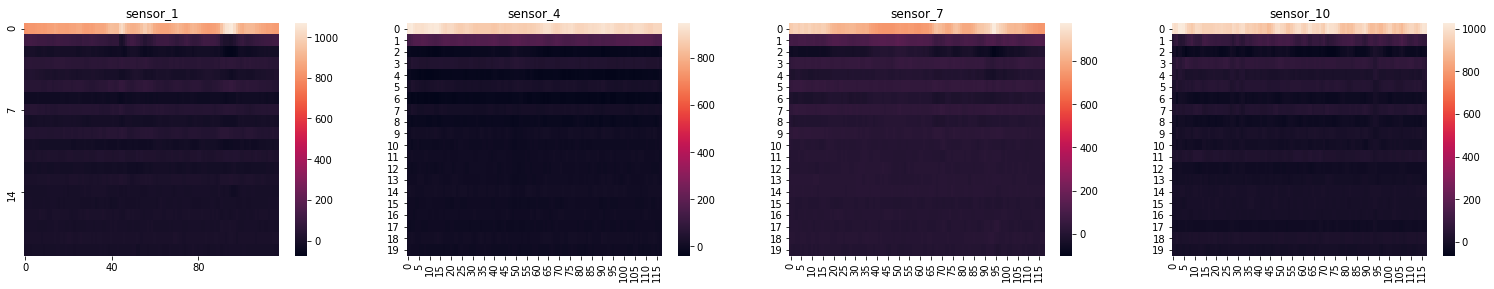

*************************segment_id 1019052648***** duration is 22465586*************************


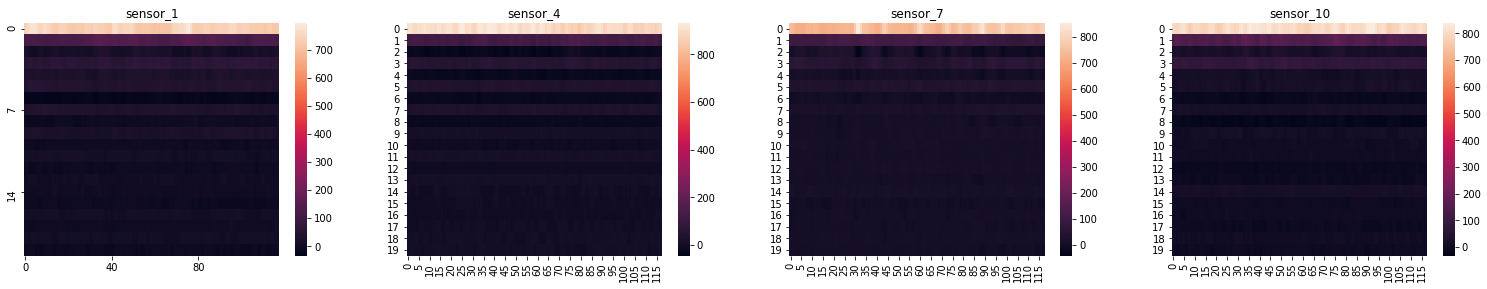

*************************segment_id 525412783***** duration is 11267639*************************


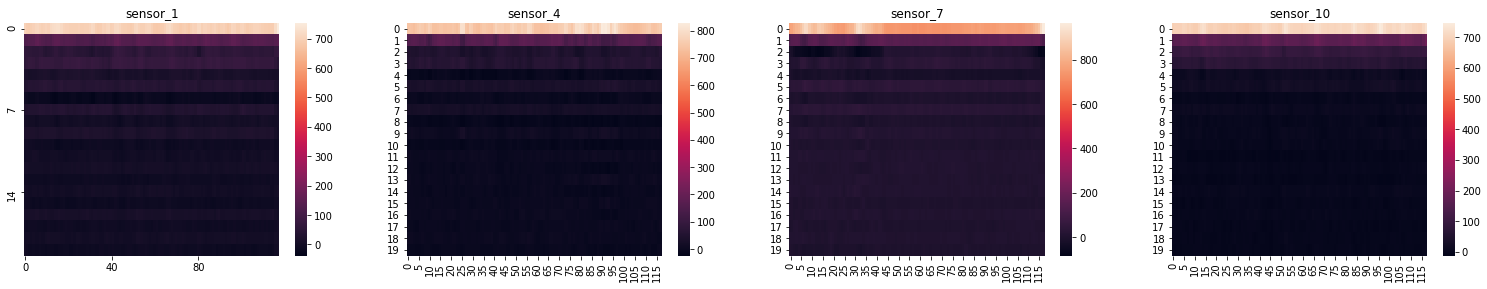

*************************segment_id 902114155***** duration is 34347071*************************


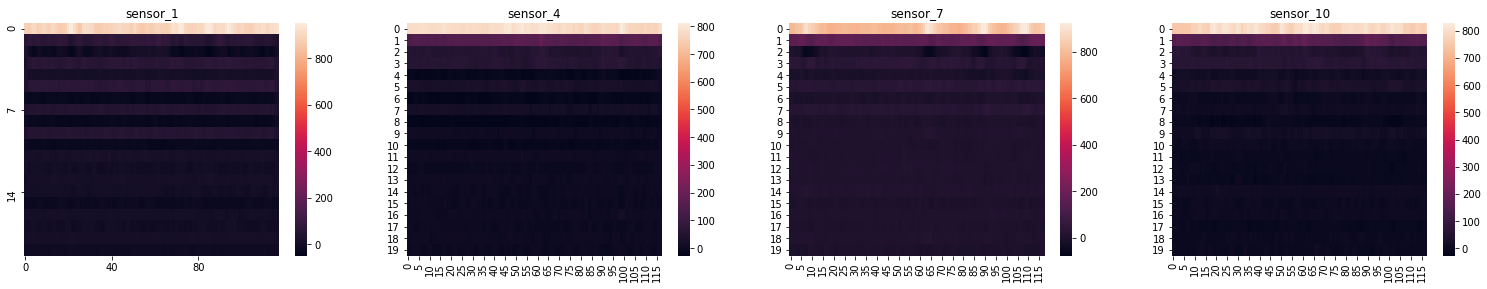

*************************segment_id 1923243961***** duration is 49046087*************************


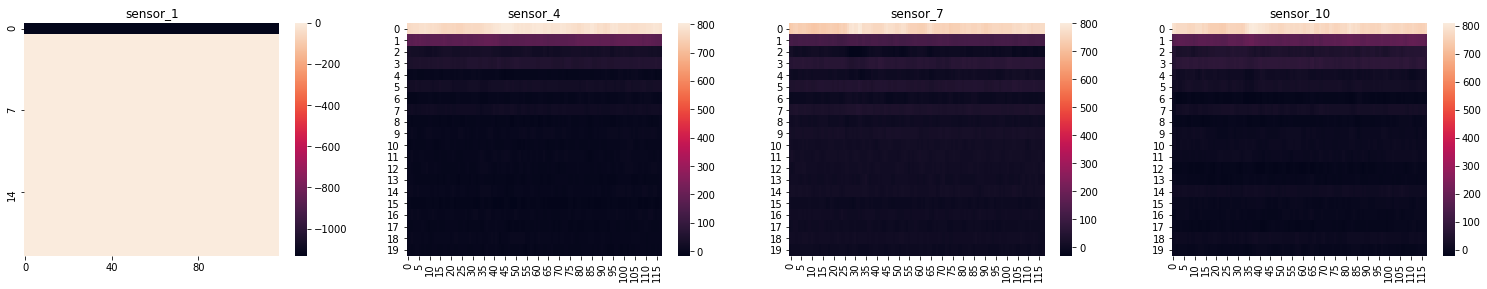

In [ ]:
# plotting the signals of 4 sensors in quantiles
for path in all_paths:
  if int(path.name.split('.')[0]) in df_q:
      c=0
      dfa=pd.read_csv(path)
      sd=dfa.columns.values
      print('*'*25 +'segment_id '+ path.name.split('.')[0]+'*'*5+' duration is {}'.format(df.time_to_eruption.values[df.segment_id == int(path.name.split('.')[0])][0]) +'*'*25)
      for i in sd:
        if i in sensor:
          c+=1
          dfa[i]=dfa[i].fillna(0)
          s_arr = dfa[i].to_numpy()
          mfcc = librosa.feature.mfcc(s_arr, sr=100)
          plt.subplot(6,6,c)
          sns.heatmap(mfcc)
          plt.gcf().set_size_inches((40, 30)) 
          plt.title(i)
      plt.show()

In [28]:
for path in all_paths:
  segment_id=path.name.split('.')[0]
  dfa=pd.read_csv(path)
  for i in sen:
    dfa[i]=dfa[i].fillna(0)
    s_arr = dfa[i].to_numpy()
    mfcc=librosa.feature.mfcc(y=s_arr, sr=0.01)
    mean_mfcc=np.mean(mfcc,axis=1)
    delta_mfcc=librosa.feature.delta(mfcc)
    mean_delta=np.mean(delta_mfcc,axis=1)
    delta2_mfcc=librosa.feature.delta(mfcc,order=2)
    mean_delta2=np.mean(delta2_mfcc,axis=1)   
    # We taking the mean of 20  features of MFCC ,its 1st and @nd derivatives
    #https://dsp.stackexchange.com/questions/38830/whats-the-correct-graphical-interpretation-of-a-series-of-mfcc-vectors
    #https://www.youtube.com/watch?v=WJI-17MNpdE
    for j in range(0, len(mfcc)):
       X.loc[segment_id,'{}_mfcc_{}_mean'.format(i,j)] = mean_mfcc[j]
       X.loc[segment_id,'{}_delta_mfcc_{}_max'.format(i,j)] = mean_delta[j]
       X.loc[segment_id,'{}_delta2_mfcc_{}_max'.format(i,j)] = mean_delta2[j]

In [29]:
X

,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,sensor_3_quantile75,...,sensor_10_delta2_mfcc_6_max,sensor_10_mfcc_7_mean,sensor_10_delta_mfcc_7_max,sensor_10_delta2_mfcc_7_max,sensor_10_mfcc_8_mean,sensor_10_delta_mfcc_8_max,sensor_10_delta2_mfcc_8_max,sensor_10_mfcc_9_mean,sensor_10_delta_mfcc_9_max,sensor_10_delta2_mfcc_9_max,sensor_10_mfcc_10_mean,sensor_10_delta_mfcc_10_max,sensor_10_delta2_mfcc_10_max,sensor_10_mfcc_11_mean,sensor_10_delta_mfcc_11_max,sensor_10_delta2_mfcc_11_max,sensor_10_mfcc_12_mean,sensor_10_delta_mfcc_12_max,sensor_10_delta2_mfcc_12_max,sensor_10_mfcc_13_mean,sensor_10_delta_mfcc_13_max,sensor_10_delta2_mfcc_13_max,sensor_10_mfcc_14_mean,sensor_10_delta_mfcc_14_max,sensor_10_delta2_mfcc_14_max,sensor_10_mfcc_15_mean,sensor_10_delta_mfcc_15_max,sensor_10_delta2_mfcc_15_max,sensor_10_mfcc_16_mean,sensor_10_delta_mfcc_16_max,sensor_10_delta2_mfcc_16_max,sensor_10_mfcc_17_mean,sensor_10_delta_mfcc_17_max,sensor_10_delta2_mfcc_17_max,sensor_10_mfcc_18_mean,sensor_10_delta_mfcc_18_max,sensor_10_delta2_mfcc_18_max,sensor_10_mfcc_19_mean,sensor_10_delta_mfcc_19_max,sensor_10_delta2_mfcc_19_max
698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.045343,6.964870,-0.021641,0.034600,0.107026,-0.000206,0.022173,3.830782,0.029451,0.011732,0.608933,0.011168,-0.014477,-6.148548,0.008847,0.002053,-0.509281,-0.025014,0.016765,-1.739986,0.056381,-0.012231,5.376806,0.060952,-0.020888,-1.946925,-0.003516,-0.008035,1.245291,-0.033628,-0.020353,-0.877028,-0.025698,0.001474,0.707742,0.017294,0.012542,0.327000,0.015428,0.018289
1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,733.0,...,0.019933,29.084197,0.103942,-0.066697,-19.074910,-0.025567,0.048225,-1.176416,0.004755,-0.012117,6.191477,-0.071231,0.024063,12.916742,-0.003813,0.027668,-5.781856,-0.071617,0.025862,-6.117689,-0.083810,0.020001,14.280184,-0.020667,0.021924,-0.830454,0.024145,0.002867,8.353982,-0.042890,-0.020211,2.770610,-0.013865,-0.020554,4.893044,0.008986,-0.007235,-7.877537,-0.037855,-0.001841
1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,159.0,...,-0.002416,8.421713,0.025972,0.019388,2.118133,0.004476,-0.001324,3.392959,0.008589,-0.023460,0.660466,-0.036908,0.007694,-4.645454,-0.011541,0.019435,2.437851,-0.028720,-0.014750,0.538338,-0.061124,-0.021289,6.173104,-0.009103,-0.003945,-1.184112,0.030236,-0.019363,0.737308,0.033738,-0.010168,-1.030826,-0.025902,-0.000732,0.546392,0.015368,-0.010615,-0.310652,-0.014383,-0.005400
544830679,91500.0,1.524975,2911.0,-2559.0,549.341607,352.0,290

In [32]:
X.to_csv("./drive/My Drive/Casestudy1.csv") 

FileNotFoundError: ignored

In [37]:
!wget --header="Host: doc-04-5c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.72 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_cqpt9v813bhhrptl6omakr7jes65ir21_nonce=sgcr95g8p0jbo" --header="Connection: keep-alive" "https://doc-04-5c-docs.googleusercontent.com/docs/securesc/d8mhp4jp9mj0hkbiocj3p22tau1jmb5b/e49vaubfamkhmg6tal16k34ha39al93j/1615215750000/05508547555063821219/05508547555063821219/1uo0LYvpnRc_2u75POKHqMUv8Il18PWHB?e=download&authuser=2&nonce=sgcr95g8p0jbo&user=05508547555063821219&hash=k9pldfl662ocej36tj31i1ulcjq9eogh" -c -O 'Casestudy12.csv'

--2021-03-08 15:04:00--  https://doc-04-5c-docs.googleusercontent.com/docs/securesc/d8mhp4jp9mj0hkbiocj3p22tau1jmb5b/e49vaubfamkhmg6tal16k34ha39al93j/1615215750000/05508547555063821219/05508547555063821219/1uo0LYvpnRc_2u75POKHqMUv8Il18PWHB?e=download&authuser=2&nonce=sgcr95g8p0jbo&user=05508547555063821219&hash=k9pldfl662ocej36tj31i1ulcjq9eogh
Resolving doc-04-5c-docs.googleusercontent.com (doc-04-5c-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-04-5c-docs.googleusercontent.com (doc-04-5c-docs.googleusercontent.com)|108.177.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Casestudy12.csv’

Casestudy12.csv         [   <=>              ]  81.58M   160MB/s    in 0.5s    

2021-03-08 15:04:00 (160 MB/s) - ‘Casestudy12.csv’ saved [85542380]



In [38]:
X=pd.read_csv('Casestudy12.csv')

In [39]:
X

,Unnamed: 0,sensor_1_sum,sensor_1_mean,sensor_1_max,sensor_1_min,sensor_1_std,sensor_1_diff_min_max,sensor_1_diff_mean_max,sensor_1_quantile25,sensor_1_quantile50,sensor_1_quantile75,sensor_1_quantile99,sensor_1_mean_10000,sensor_1_mean_10000l,sensor_1_std_10000,sensor_1_std_10000l,sensor_2_sum,sensor_2_mean,sensor_2_max,sensor_2_min,sensor_2_std,sensor_2_diff_min_max,sensor_2_diff_mean_max,sensor_2_quantile25,sensor_2_quantile50,sensor_2_quantile75,sensor_2_quantile99,sensor_2_mean_10000,sensor_2_mean_10000l,sensor_2_std_10000,sensor_2_std_10000l,sensor_3_sum,sensor_3_mean,sensor_3_max,sensor_3_min,sensor_3_std,sensor_3_diff_min_max,sensor_3_diff_mean_max,sensor_3_quantile25,sensor_3_quantile50,...,sensor_1_rolling_mean_100,sensor_1_rolling_std_100,sensor_1_rolling_max_100,sensor_1_rolling_min_100,sensor_2_rolling_mean_100,sensor_2_rolling_std_100,sensor_2_rolling_max_100,sensor_2_rolling_min_100,sensor_3_rolling_mean_100,sensor_3_rolling_std_100,sensor_3_rolling_max_100,sensor_3_rolling_min_100,sensor_4_rolling_mean_100,sensor_4_rolling_std_100,sensor_4_rolling_max_100,sensor_4_rolling_min_100,sensor_5_rolling_mean_100,sensor_5_rolling_std_100,sensor_5_rolling_max_100,sensor_5_rolling_min_100,sensor_6_rolling_mean_100,sensor_6_rolling_std_100,sensor_6_rolling_max_100,sensor_6_rolling_min_100,sensor_7_rolling_mean_100,sensor_7_rolling_std_100,sensor_7_rolling_max_100,sensor_7_rolling_min_100,sensor_8_rolling_mean_100,sensor_8_rolling_std_100,sensor_8_rolling_max_100,sensor_8_rolling_min_100,sensor_9_rolling_mean_100,sensor_9_rolling_std_100,sensor_9_rolling_max_100,sensor_9_rolling_min_100,sensor_10_rolling_mean_100,sensor_10_rolling_std_100,sensor_10_rolling_max_100,sensor_10_rolling_min_100
0,698305523,200457.0,3.340894,2931.0,-3019.0,367.633890,-88.0,2927.659106,-214.0,0.0,219.0,970.0,4.9501,1.0707,432.279698,284.327545,139207.0,2.320078,4738.0,-6015.0,514.740948,-1277.0,4735.679922,-245.0,0.0,250.0,1456.0,9.9759,-31.2292,607.668508,376.987984,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,169.620301,12560.427735,101000.416381,-100518.814577,109.801028,7318.858618,82460.650587,-65971.628929,0.000000,0.000000,0.000000,0.000000,-101.702544,9658.821046,37860.546906,-41859.374593,-18.111054,2198.300876,25286.849071,-30101.034547,770.053448,52707.620672,165219.792330,-145440.692262,-413.937449,18213.129008,83060.769122,-68436.016554,90.522089,26553.606751,90926.196470,-90599.871335,0.000000,0.000000,0.000000,0.000000,65.655065,15043.202930,114344.945877,-115229.604770
1,1191644191,-165217.0,-2.753571,4223.0,-4154.0,611.311853,69.0,4220.246429,-376.0,0.0,369.0,1557.0,-3.4140,-1.6858,766.909079,530.485286,-8315.0,-0.138581,20325.0,-11098.0,1140.506282,9227.0,20324.861419,-582.0,0.0,582.0,3057.0,-1.1737,-3.3488,1485.371941,1047.332342,-3407912.0,-56.797587,4863.0,-4617.0,1213.212902,246.0,4806.202413,-776.0,0.0,...,-127.987868,17872.470064,63185.450933,-75414.603451,-7.568476,13309.511555,162725.319550,-213930.268345,-2787.964789,56027.833712,190487.754195,-204473.438197,-66.206437,16822.822031,61979.902191,-61442.031437,-2.798846,473.047632,9352.818705,-7071.722522,751.287779,41078.410030,135828.790562,-126549.163249,372.027733,31667.498627,128111.273316,-97630.384883,206.703481,37717.767319,111428.176279,-150875.433831,52.105823,12029.097913,70767.791070,-71823.590341,499.870725,30508.686691,126078.853724,-164003.213363
2,1403440092,-95822.0,-1.597007,2118.0,-1918.0,306.984282,200.0,2116.402993,-184.0,0.0,186.0,748.0,-2.0455,-4.0018,288.242237,269.900865,-10101.0,-0.168347,8604.0,-6475.0,514.620059,2129.0,8603.831653,-254.0,0.0,249.0,1369.0,-1.2282,-0.0584,454.868550,333.709113,-192776.0,-3.212880,1335.0,-1646.0,259.603885,-311.0,1331.787120,-165.0,0.0,...,-70.539987,8400.388923,70925.556339,-57435.023158,-13.389881,5652.716551,57149.347197,-38962.240673,-150.096677,7317.215505,36723.636479,-39184.035652,19.749261,6584.465991,37627.717487,-33677.438245,-44.171727,2082.616831,26549.361167,-28961.676900,96.706874,23969.962

In [ ]:
print(X.columns)

Index(['Unnamed: 0', 'sensor_1_sum', 'sensor_1_mean', 'sensor_1_max',
       'sensor_1_min', 'sensor_1_std', 'sensor_1_diff_min_max',
       'sensor_1_diff_mean_max', 'sensor_1_quantile25', 'sensor_1_quantile50',
       ...
       'sensor_8_rolling_max_100', 'sensor_8_rolling_min_100',
       'sensor_9_rolling_mean_100', 'sensor_9_rolling_mean_1000',
       'sensor_9_rolling_max_100', 'sensor_9_rolling_min_100',
       'sensor_10_rolling_mean_100', 'sensor_10_rolling_mean_1000',
       'sensor_10_rolling_max_100', 'sensor_10_rolling_min_100'],
      dtype='object', length=1101)


## Part 6 Plots

### Bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


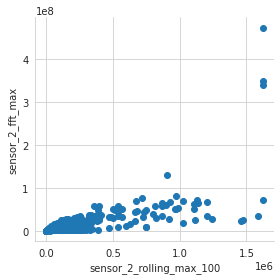

In [ ]:
#sensor_2_rolling_max_100 vs sensor_2_fft_max
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_2_rolling_max_100", "sensor_2_fft_max");
plt.show();

* fft max  appears t be increasing irregularly with increasing rolling max

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


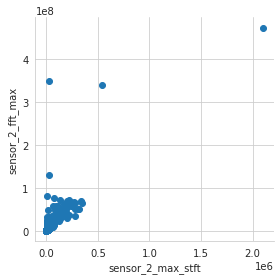

In [ ]:
#sensor_2_max_stft vs sensor_2_fft_max
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_2_max_stft", "sensor_2_fft_max");
plt.show();

* Mostof the values are accumulated at the bottom and also appears tobe slightly linear. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


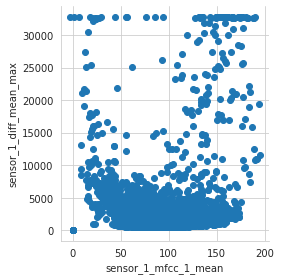

In [ ]:
# sensor_1_mfcc_1_mean vs sensor_1_diff_mean_max
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_1_mfcc_1_mean", "sensor_1_diff_mean_max");
plt.show();

* Values are accumulated at bottom region saying not  much deifference between meean and max but abnormalities canbe spotted

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


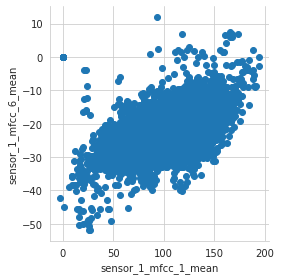

In [ ]:
# sensor_1_mfcc_1_mean vs sensor_1_mfcc_6_mean
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_1_mfcc_1_mean", "sensor_1_mfcc_6_mean");
plt.show();

* The points are spread almost randomly.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


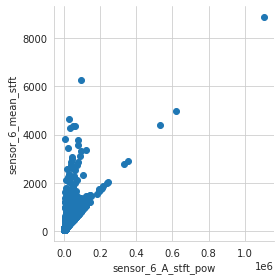

In [ ]:
# sensor_6_A_stft_pow  vs sensor_6_mean_stft
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_6_A_stft_pow", "sensor_6_mean_stft");
plt.show();

* few points in stft pow is showing linear relation but others donot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


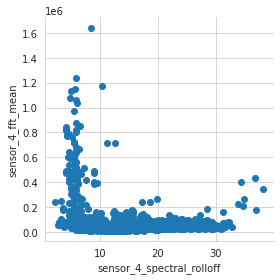

In [ ]:
# sensor_4_spectral_rolloff vs sensor_4_fft_mean
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_4_spectral_rolloff", "sensor_4_fft_mean");
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


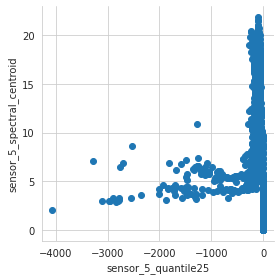

In [ ]:
# sensor_5_quantile25  vs sensor_5_spectral_centroid
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_5_quantile25", "sensor_5_spectral_centroid");
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


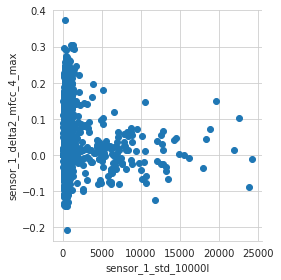

In [ ]:
# sensor_1_std_10000l  vs sensor_1_delta2_mfcc_4_max
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_1_std_10000l", "sensor_1_delta2_mfcc_4_max");
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


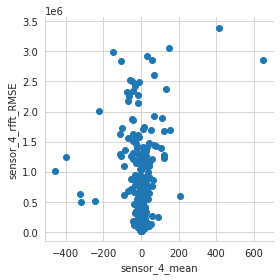

In [ ]:
# sensor_4_mean vs sensor_4_rfft_RMSE
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_4_mean", "sensor_4_rfft_RMSE");
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


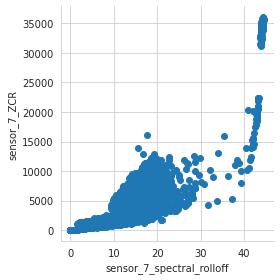

In [ ]:
# sensor_7_spectral_rolloff vs sensor_7_ZCR
sns.set_style("whitegrid");
sns.FacetGrid(X ,size=4).map(plt.scatter, "sensor_7_spectral_rolloff", "sensor_7_ZCR");
plt.show();

### Observations:

* In some plots we can observe a slight linear relation
* 1 or 2 shows polynomial relation
* In some one observation is centered in a constant values
* Many of the points are alsorandomly distributed

### Heat Map

Ref: 
* https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7

* https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
X.rename(columns = {'Unnamed: 0':'segment_id'}, inplace = True) 

In [ ]:
df.columns

Index(['segment_id', 'time_to_eruption'], dtype='object')

In [ ]:
X= pd.merge(X, df, on='segment_id', how='left')

In [ ]:
X=X.drop(columns="segment_id")

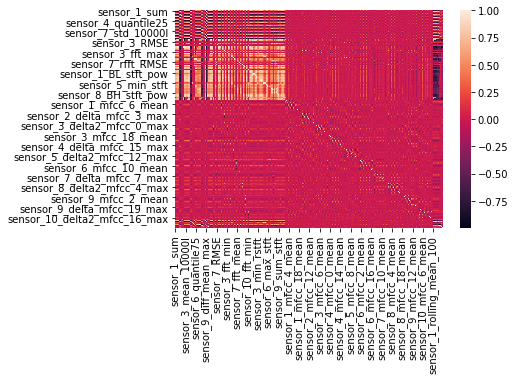

In [ ]:
sns.heatmap(X.corr())

### Observations
* Some observation are correlated and many are not we can neglect some of the correlated values

In [ ]:
Y1=pd.DataFrame()

In [ ]:
Y1=X[["sensor_1_sum",'sensor_1_std','sensor_1_diff_mean_max','sensor_1_quantile75','sensor_1_mean_grad','sensor_1_ZCR','sensor_1_mean_stft','sensor_1_BH_stft_pow','sensor_1_A_stft_pow','sensor_1_BL_stft_pow','sensor_1_C_stft_pow','sensor_1_D_stft_pow','sensor_1_mfcc_1_mean','sensor_1_delta_mfcc_1_max','sensor_1_delta2_mfcc_1_max','time_to_eruption']]

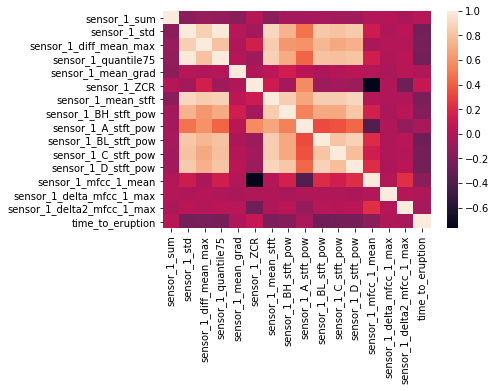

In [ ]:
sns.heatmap(Y1.corr())

### Observations

We can see few negative and near to zero correclation between time to eruption and other features

In [ ]:
X

,sensor_1_fft_RMSE,sensor_2_fft_RMSE,sensor_3_fft_RMSE,sensor_4_fft_RMSE,sensor_5_fft_RMSE,sensor_6_fft_RMSE,sensor_7_fft_RMSE,sensor_8_fft_RMSE,sensor_9_fft_RMSE,sensor_10_fft_RMSE
698305523,11023.747503,5251.039707,0.000000,15859.393053,3336.300946,63103.835969,31815.825983,34638.606886,0.000000,33952.754248
1191644191,20127.636324,30421.034105,90264.919576,30771.984596,204.107815,31131.395728,57840.380315,25638.615212,25484.551811,29754.268652
1403440092,7261.337824,13685.652560,9793.485998,4982.922335,6264.887708,31130.343943,12954.319588,25247.493381,6970.388727,10421.335807
544830679,19822.684152,5095.229926,0.000000,6744.894291,6856.573999,46382.429841,18704.206586,95687.615264,0.000000,31578.403459
1313680478,14899.510663,11185.212068,6917.263693,2380.688766,4155.484930,15884.222235,18318.472262,25920.033005,13394.520074,48032.244649
...,...,...,...,...,...,...,...,...,...,...
2016361594,76970.345179,8791.314009,101940.760072,64267.445149,6781.542008,176103.528519,95594.904812,124663.703707,12577.820956,81479.804602
1904612417,3831.204510,0.000000,6723.362254,22905.944294,2195.723116,28372.137195,8116.826350,0.000000,7167.471869,6969.857531
1098612833,25832.207765,70993.951637,14617.790804,7797.934727,0.000000,56455.532652,23232.528188,12384.859910,16777.251712,24730.981319
512339405,9541.365049,63017.522095,19374.382261,18116.512358,0.000000,62083.613055,19518.512033,31897.593373,13151.585836,20358.969497


In [ ]:
X1=X

In [ ]:
X1.index.names = ['segment_id']

In [ ]:
X1

,sensor_1_fft_RMSE,sensor_2_fft_RMSE,sensor_3_fft_RMSE,sensor_4_fft_RMSE,sensor_5_fft_RMSE,sensor_6_fft_RMSE,sensor_7_fft_RMSE,sensor_8_fft_RMSE,sensor_9_fft_RMSE,sensor_10_fft_RMSE
segment_id,,,,,,,,,,
698305523,11023.747503,5251.039707,0.000000,15859.393053,3336.300946,63103.835969,31815.825983,34638.606886,0.000000,33952.754248
1191644191,20127.636324,30421.034105,90264.919576,30771.984596,204.107815,31131.395728,57840.380315,25638.615212,25484.551811,29754.268652
1403440092,7261.337824,13685.652560,9793.485998,4982.922335,6264.887708,31130.343943,12954.319588,25247.493381,6970.388727,10421.335807
544830679,19822.684152,5095.229926,0.000000,6744.894291,6856.573999,46382.429841,18704.206586,95687.615264,0.000000,31578.403459
1313680478,14899.510663,11185.212068,6917.263693,2380.688766,4155.484930,15884.222235,18318.472262,25920.033005,13394.520074,48032.244649
...,...,...,...,...,...,...,...,...,...,...
2016361594,76970.345179,8791.314009,101940.760072,64267.445149,6781.542008,176103.528519,95594.904812,124663.703707,12577.820956,81479.804602
1904612417,3831.204510,0.000000,6723.362254,22905.944294,2195.723116,28372.137195,8116.826350,0.000000,7167.471869,6969.857531
1098612833,25832.207765,70993.951637,14617.790804,7797.934727,0.000000,56455.532652,23232.528188,12384.859910,16777.251712,24730.981319


In [ ]:
X1= pd.merge(X1, df, how="left", on="segment_id")

ValueError: ignored